# **Bank Account Fraud (NeurIPS 2022)**

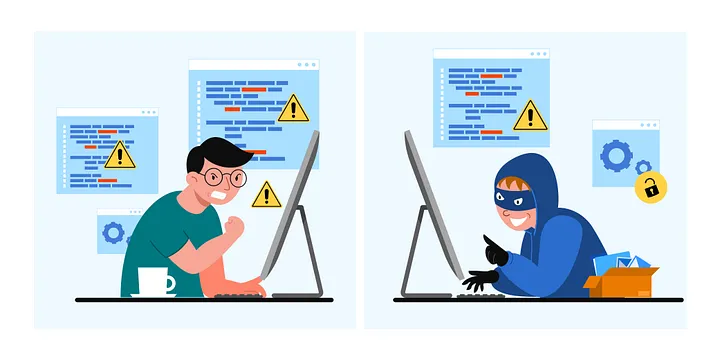

# **Data Describtion**
The Bank Account Fraud (BAF) suite of datasets has been published at NeurIPS 2022 and it comprises a total of 6 different synthetic bank account fraud tabular datasets. BAF is a realistic, complete, and robust test bed to evaluate novel and existing methods in ML and fair ML, and the first of its kind!

**This suite of datasets is:**

- Realistic, based on a present-day real-world dataset for fraud detection;
- Biased, each dataset has distinct controlled types of bias;
- Imbalanced, this setting presents a extremely low prevalence of positive class;
- Dynamic, with temporal data and observed distribution shifts;
- Privacy preserving, to protect the identity of potential applicants we have applied differential privacy - techniques (noise addition), feature encoding and trained a generative model (CTGAN).

**Each dataset is composed of:**

- 1 million instances;
- 30 realistic features used in the fraud detection use-case;
- A column of “month”, providing temporal information about the dataset;
- Protected attributes, (age group, employment status and % income).

Detailed information (datasheet) on the suite: https://github.com/feedzai/bank-account-fraud/blob/main/documents/datasheet.pdf

Check out the github repository for more resources and some example notebooks: https://github.com/feedzai/bank-account-fraud

Read the NeurIPS 2022 paper here: https://arxiv.org/abs/2211.13358

Learn more about Feedzai Research here: https://research.feedzai.com/

Please, use the following citation of BAF dataset suite

        @article{jesusTurningTablesBiased2022,
          title={Turning the {{Tables}}: {{Biased}}, {{Imbalanced}}, {{Dynamic Tabular Datasets}} for {{ML Evaluation}}},
          author={Jesus, S{\'e}rgio and Pombal, Jos{\'e} and Alves, Duarte and Cruz, Andr{\'e} and Saleiro, Pedro and Ribeiro, Rita P. and Gama, Jo{\~a}o and Bizarro, Pedro},
          journal={Advances in Neural Information Processing Systems},
          year={2022}
        }

# **Importing the libraries and the dataset**

In [ ]:
!pip install missingno imbalanced-learn aequitas-lite

  Using cached missingno-0.5.2-py3-none-any.whl (8.7 kB)
  Using cached imbalanced_learn-0.11.0-py3-none-any.whl (235 kB)
  Using cached aequitas_lite-0.43.5-py3-none-any.whl (69 kB)
  Using cached millify-0.1.1-py3-none-any.whl


In [ ]:
!pip install xgboost

  Using cached xgboost-1.7.6-py3-none-manylinux2014_x86_64.whl (200.3 MB)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import numpy as np
import pandas as pd
import random
from aequitas.group import Group

from imblearn.combine import SMOTEENN
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import ClusterCentroids
from imblearn.under_sampling import CondensedNearestNeighbour
from imblearn.under_sampling import InstanceHardnessThreshold
from imblearn.under_sampling import OneSidedSelection
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import TomekLinks
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.impute import SimpleImputer
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score,classification_report,precision_recall_fscore_support,roc_auc_score,roc_curve,confusion_matrix,auc
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import make_classification
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam
from sklearn.tree import DecisionTreeClassifier
from random import randint

# imports for neural network
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import backend as K
#Set Matplotlib options
%matplotlib inline
plt.style.use('ggplot')
sns.set_style("whitegrid")

#Increase max Pandas columns
pd.set_option('display.max_columns', 200)

#Define color palette
my_palette = sns.color_palette("Paired", 2)

# ignore FutureWarning
import warnings
warnings.simplefilter(action = 'ignore')

2023-07-30 23:08:18.134938: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-30 23:08:18.822729: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [ ]:
'''# Install kaggle API
! pip install -q kaggle'''

'# Install kaggle API\n! pip install -q kaggle'

**upload kaggle API key to colab notebook**

In [ ]:
'''# Make directory named kaggle and copy kaggle.json file there
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/'''

'# Make directory named kaggle and copy kaggle.json file there\n! mkdir ~/.kaggle\n! cp kaggle.json ~/.kaggle/'

In [ ]:
'''# disable API key
! chmod 600 /root/.kaggle/kaggle.json'''

'# disable API key\n! chmod 600 /root/.kaggle/kaggle.json'

In [ ]:
'''# import the dataset
! kaggle datasets download -d mlg-ulb/creditcardfraud'''

'# import the dataset\n! kaggle datasets download -d mlg-ulb/creditcardfraud'

In [ ]:
'''# unzipping the dataset
! unzip -q /content/creditcardfraud.zip'''

'# unzipping the dataset\n! unzip -q /content/creditcardfraud.zip'

# **Data Exploration**

In [ ]:
df = pd.read_csv('Fraud Detection/neurips-2022/Base.csv')

In [ ]:
df.head().T

0            1            2   
fraud_bool                                   1            1            1  \
income                                     0.9          0.9          0.9   
name_email_similarity                 0.166828     0.296286     0.044985   
prev_address_months_count                   -1           -1           -1   
current_address_months_count                88          144          132   
customer_age                                50           50           40   
days_since_request                    0.020925     0.005418     3.108549   
intended_balcon_amount               -1.331345    -0.816224    -0.755728   
payment_type                                AA           AB           AC   
zip_count_4w                               769          366          870   
velocity_6h                       10650.765523   534.047319  4048.534263   
velocity_24h                        3134.31963  2670.918292  2893.621498   
velocity_4w                         3863.64774  3124.298166  3159.590679   
bank_branch_count_8w                         1          718            1   
date_of_birth_distinct_emails_4w             6            3           14   
employment_status                           CA           CA           CB   
credit_risk_score                          185          259          177   
email_is_free                                0            1            1   
housing_status                              BA           BA           BA   
phone_home_valid                             1            0            0   
phone_mobile_valid                           0            0            1   
bank_months_count                           24           15           -1   
has_other_cards                              0            0            0   
proposed_credit_limit                    500.0       1500.0        200.0   
foreign_request                              0            0            0   
source                                INTERNET     INTERNET     INTERNET   
session_length_in_minutes             3.888115    31.798819     4.728705   
device_os                              windows      windows        other   
keep_alive_session                           0            0            0   
device_distinct_emails_8w                    1            1            1   
device_fraud_count                           0            0            0   
month                                        7            7            7   

                                            3            4  
fraud_bool                                  1            1  
income                                    0.9          0.9  
name_email_similarity                0.159511     0.596414  
prev_address_months_count                  -1           -1  
current_address_months_count               22          218  
customer_age                               50           50  
days_since_request                   0.019079     0.004441  
intended_balcon_amount              -1.205124    -0.773276  
payment_type                               AB           AB  
zip_count_4w                              810          890  
velocity_6h                       3457.064063  5020.341679  
velocity_24h                      4054.908412  2728.237159  
velocity_4w                       3022.261812  3087.670952  
bank_branch_count_8w                     1921         1990  
date_of_birth_distinct_emails_4w            6            2  
employment_status                          CA           CA  
credit_risk_score                         110          295  
email_is_free                               1            1  
housing_status                             BA           BA  
phone_home_valid                            0            1  
phone_mobile_valid                          1            0  
bank_months_count                          31           31  
has_other_cards                             1            0  
proposed_credit_limit                   200.0       1500.0  
foreign_req

In [ ]:
df.shape

(1000000, 32)

In [ ]:
df.columns

Index(['fraud_bool', 'income', 'name_email_similarity',
       'prev_address_months_count', 'current_address_months_count',
       'customer_age', 'days_since_request', 'intended_balcon_amount',
       'payment_type', 'zip_count_4w', 'velocity_6h', 'velocity_24h',
       'velocity_4w', 'bank_branch_count_8w',
       'date_of_birth_distinct_emails_4w', 'employment_status',
       'credit_risk_score', 'email_is_free', 'housing_status',
       'phone_home_valid', 'phone_mobile_valid', 'bank_months_count',
       'has_other_cards', 'proposed_credit_limit', 'foreign_request', 'source',
       'session_length_in_minutes', 'device_os', 'keep_alive_session',
       'device_distinct_emails_8w', 'device_fraud_count', 'month'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 32 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   fraud_bool                        1000000 non-null  int64  
 1   income                            1000000 non-null  float64
 2   name_email_similarity             1000000 non-null  float64
 3   prev_address_months_count         1000000 non-null  int64  
 4   current_address_months_count      1000000 non-null  int64  
 5   customer_age                      1000000 non-null  int64  
 6   days_since_request                1000000 non-null  float64
 7   intended_balcon_amount            1000000 non-null  float64
 8   payment_type                      1000000 non-null  object 
 9   zip_count_4w                      1000000 non-null  int64  
 10  velocity_6h                       1000000 non-null  float64
 11  velocity_24h                      1000

In [ ]:
# statistical summary
df.describe().T

count         mean          std   
fraud_bool                        1000000.0     0.011029     0.104438  \
income                            1000000.0     0.562696     0.290343   
name_email_similarity             1000000.0     0.493694     0.289125   
prev_address_months_count         1000000.0    16.718568    44.046230   
current_address_months_count      1000000.0    86.587867    88.406599   
customer_age                      1000000.0    33.689080    12.025799   
days_since_request                1000000.0     1.025705     5.381835   
intended_balcon_amount            1000000.0     8.661499    20.236155   
zip_count_4w                      1000000.0  1572.692049  1005.374565   
velocity_6h                       1000000.0  5665.296605  3009.380665   
velocity_24h                      1000000.0  4769.781965  1479.212612   
velocity_4w                       1000000.0  4856.324016   919.843934   
bank_branch_count_8w              1000000.0   184.361849   459.625329   
date_of_birth_distinct_emails_4w  1000000.0     9.503544     5.033792   
credit_risk_score                 1000000.0   130.989595    69.681812   
email_is_free                     1000000.0     0.529886     0.499106   
phone_home_valid                  1000000.0     0.417077     0.493076   
phone_mobile_valid                1000000.0     0.889676     0.313293   
bank_months_count                 1000000.0    10.839303    12.116875   
has_other_cards                   1000000.0     0.222988     0.416251   
proposed_credit_limit             1000000.0   515.851010   487.559902   
foreign_request                   1000000.0     0.025242     0.156859   
session_length_in_minutes         1000000.0     7.544940     8.033106   
keep_alive_session                1000000.0     0.576947     0.494044   
device_distinct_emails_8w         1000000.0     1.018312     0.180761   
device_fraud_count                1000000.0     0.000000     0.000000   
month                             1000000.0     3.288674     2.209994   

                                           min          25%          50%   
fraud_bool                        0.000000e+00     0.000000     0.000000  \
income                            1.000000e-01     0.300000     0.600000   
name_email_similarity             1.434550e-06     0.225216     0.492153   
prev_address_months_count        -1.000000e+00    -1.000000    -1.000000   
current_address_months_count     -1.000000e+00    19.000000    52.000000   
customer_age                      1.000000e+01    20.000000    30.000000   
days_since_request                4.036860e-09     0.007193     0.015176   
intended_balcon_amount           -1.553055e+01    -1.181488    -0.830507   
zip_count_4w                      1.000000e+00   894.000000  1263.000000   
velocity_6h                      -1.706031e+02  3436.365848  5319.769349   
velocity_24h                      1.300307e+03  3593.179135  4749.921161   
velocity_4w                       2.825748e+03  4268.368423  4913.436941   
bank_branch_count_8w              0.000000e+00     1.000000     9.000000   
date_of_birth_distinct_emails_4w  0.000000e+00     6.000000     9.000000   
credit_risk_score                -1.700000e+02    83.000000   122.000000   
email_is_free                     0.000000e+00     0.000000     1.000000   
phone_home_valid                  0.000000e+00     0.000000     0.000000   
phone_mobile_valid                0.000000e+00     1.000000     1.000000   
bank_months_count                -1.000000e+00    -1.000000     5.000000   
has_other_cards                   0.000000e+00     0.000000     0.000000   
proposed_credit_limit             1.900000e+02   200.000000   200.000000   
foreign_request                   0.000000e+00     0.000000     0.000000   
session_length_in_minutes        -1.000000e+00     3.103053     5.114321   
keep_alive_session                0.000000e+00     0.000000     1.000000   
device_distinct_emails_8w        -1.000000e+00     1.000000     1.000000   
device_fraud_coun

In [ ]:
df.describe(include=["object", "bool"]).T

count unique       top    freq
payment_type       1000000      5        AB  370554
employment_status  1000000      7        CA  730252
housing_status     1000000      7        BC  372143
source             1000000      2  INTERNET  992952
device_os          1000000      5     other  342728

**We can notice that the feature distributions and whether they are skewed or have high kurtosis:**

- fraud_bool: Highly skewed towards 0 with skewness of 5.76, indicating very few fraudulent transactions
- income: Slightly right skewed with skewness of 0.46, so majority of customers have lower to mid range incomes
- name_email_similarity: Approximately symmetric with skewness of 0.07
- prev_address_months_count: Highly right skewed with skewness of 3.13, indicating most customers have been at their previous address for just a few months
- current_address_months_count: Right skewed with skewness of 1.84
- customer_age: Approximately symmetric with skewness of -0.22
- days_since_request: Highly right skewed with skewness of 6.55, indicating few requests are several weeks old
- intended_balcon_amount: Highly right skewed with skewness of 3.18, majority of requests are for modest amounts
- zip_count_4w: Right skewed with skewness of 1.41

Other features also show signs of skewness and some have high kurtosis indicating more outlier values, most features have skewed distributions rather than normal or symmetric ones.

In [ ]:
df.nunique()

fraud_bool                               2
income                                   9
name_email_similarity               998861
prev_address_months_count              374
current_address_months_count           423
customer_age                             9
days_since_request                  989330
intended_balcon_amount              994971
payment_type                             5
zip_count_4w                          6306
velocity_6h                         998687
velocity_24h                        998940
velocity_4w                         998318
bank_branch_count_8w                  2326
date_of_birth_distinct_emails_4w        40
employment_status                        7
credit_risk_score                      551
email_is_free                            2
housing_status                           7
phone_home_valid                         2
phone_mobile_valid                       2
bank_months_count                       33
has_other_cards                          2
proposed_cr

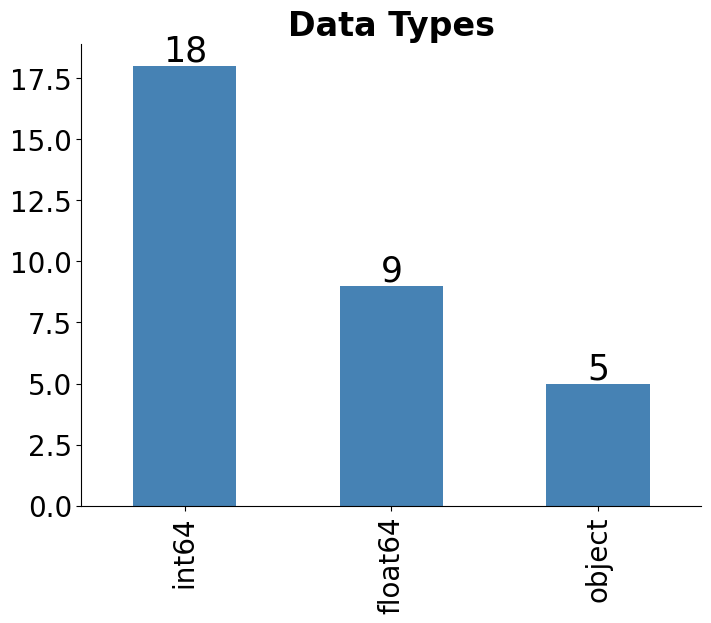

In [ ]:
sns.set(style="ticks", context="talk",font_scale = 1)
plt.style.use("default")
plt.figure(figsize = (8,6))
ax = df.dtypes.value_counts().plot(kind='bar',grid = False,fontsize=20,color='SteelBlue')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+ p.get_width() / 2., height + 0.2, height, ha = 'center', size = 25, color='black')
ax.set_title('Data Types', ha = 'center', weight='bold', fontsize=24)
sns.despine()
plt.show()

In [ ]:
df.select_dtypes(include='object').columns

Index(['payment_type', 'employment_status', 'housing_status', 'source',
       'device_os'],
      dtype='object')

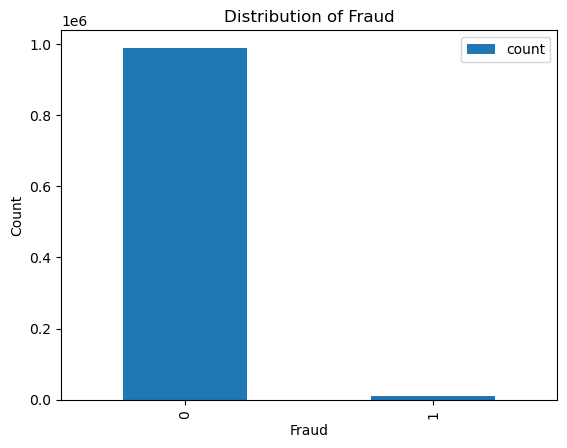

In [ ]:
# Count the number of True and False values
fraud_bool_counts = df['fraud_bool'].value_counts()

# Plot a bar chart
fraud_bool_counts.plot.bar()

# Add a title
plt.title('Distribution of Fraud')

# Add x and y labels
plt.xlabel('Fraud')
plt.ylabel('Count')

# Show the legend
plt.legend()

# Show the plot
plt.show()

In [ ]:
print(f"Fraud cases: {fraud_bool_counts[1]}")
print(f"Non-fraud cases: {fraud_bool_counts[0]}")

Fraud cases: 11029
Non-fraud cases: 988971


In [ ]:
10

10

## **Correlation matrix and heatmap**

In [ ]:
numerical_features = []

for col in df.columns:
    if df[col].dtypes =='float64' or df[col].dtypes =='int64':
        numerical_features.append(col)

numerical_features

['fraud_bool',
 'income',
 'name_email_similarity',
 'prev_address_months_count',
 'current_address_months_count',
 'customer_age',
 'days_since_request',
 'intended_balcon_amount',
 'zip_count_4w',
 'velocity_6h',
 'velocity_24h',
 'velocity_4w',
 'bank_branch_count_8w',
 'date_of_birth_distinct_emails_4w',
 'credit_risk_score',
 'email_is_free',
 'phone_home_valid',
 'phone_mobile_valid',
 'bank_months_count',
 'has_other_cards',
 'proposed_credit_limit',
 'foreign_request',
 'session_length_in_minutes',
 'keep_alive_session',
 'device_distinct_emails_8w',
 'device_fraud_count',
 'month']

In [ ]:
num_df=df[numerical_features]

In [ ]:
df_dumm = pd.get_dummies(df,drop_first=True) # one hot encoding

In [ ]:
df_dumm.shape

(1000000, 48)

In [ ]:
dataset_2 = df_dumm.drop(columns='fraud_bool')

<Axes: title={'center': 'Correlated with Class'}>

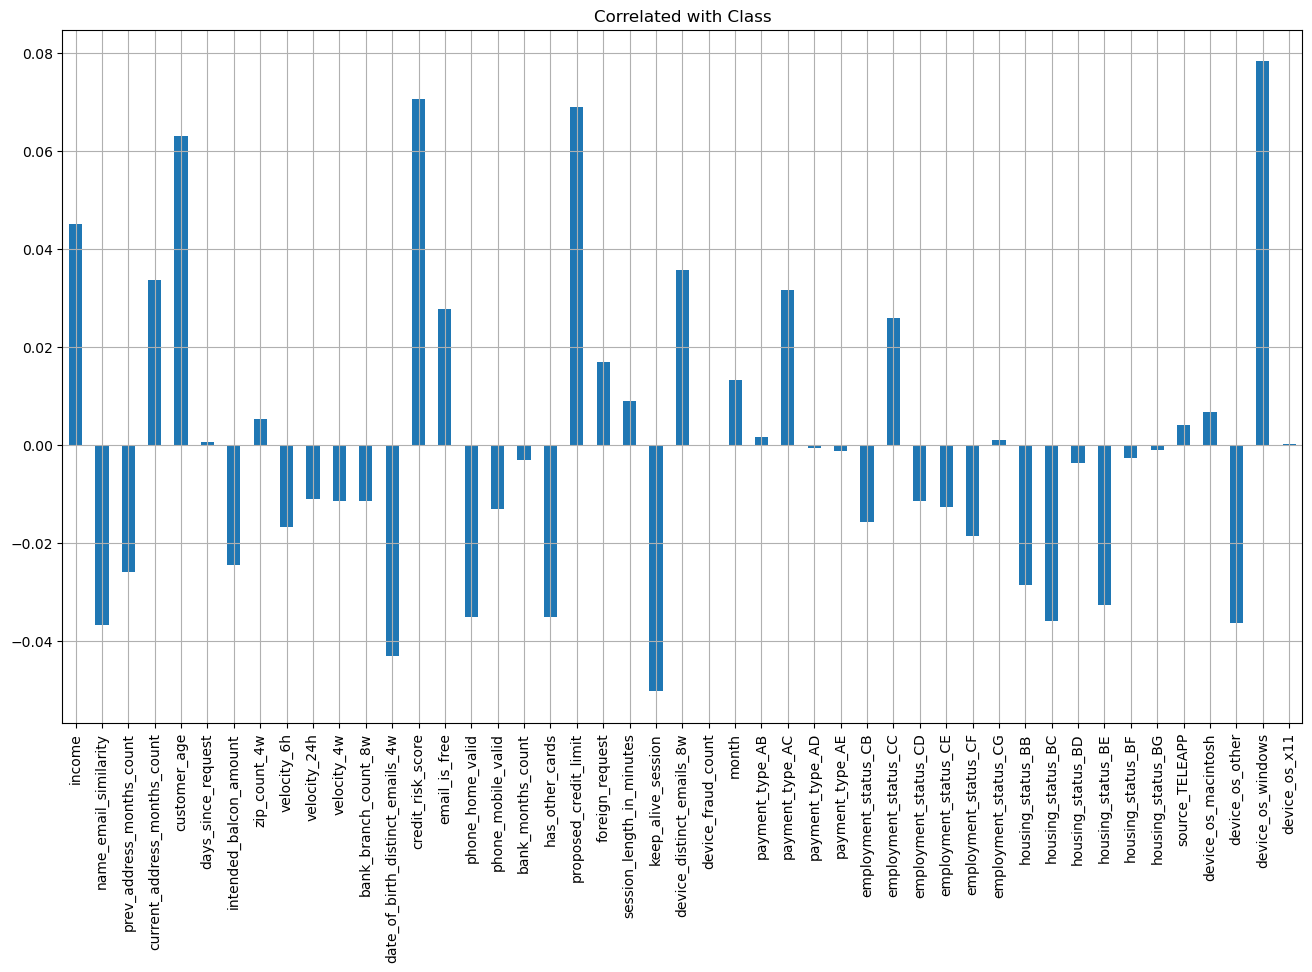

In [ ]:
corr = dataset_2.corrwith(df_dumm['fraud_bool'])
dataset_2.corrwith(df_dumm['fraud_bool']).plot.bar(
    figsize=(16, 9),
    title='Correlated with Class',
    grid=True
)

In [ ]:
# Get top 20 most correlated features
top_features = corr.nlargest(20).index
top_features

Index(['device_os_windows', 'credit_risk_score', 'proposed_credit_limit',
       'customer_age', 'income', 'device_distinct_emails_8w',
       'current_address_months_count', 'payment_type_AC', 'email_is_free',
       'employment_status_CC', 'foreign_request', 'month',
       'session_length_in_minutes', 'device_os_macintosh', 'zip_count_4w',
       'source_TELEAPP', 'payment_type_AB', 'employment_status_CG',
       'days_since_request', 'device_os_x11'],
      dtype='object')

In [ ]:
corr=num_df.corr()

In [ ]:
#correlation of numerical features
plt.figure(figsize=(16, 9))
ax = sns.heatmap(corr, annot=True, linewidths=2)

In [ ]:
corr = df_dumm.corr()

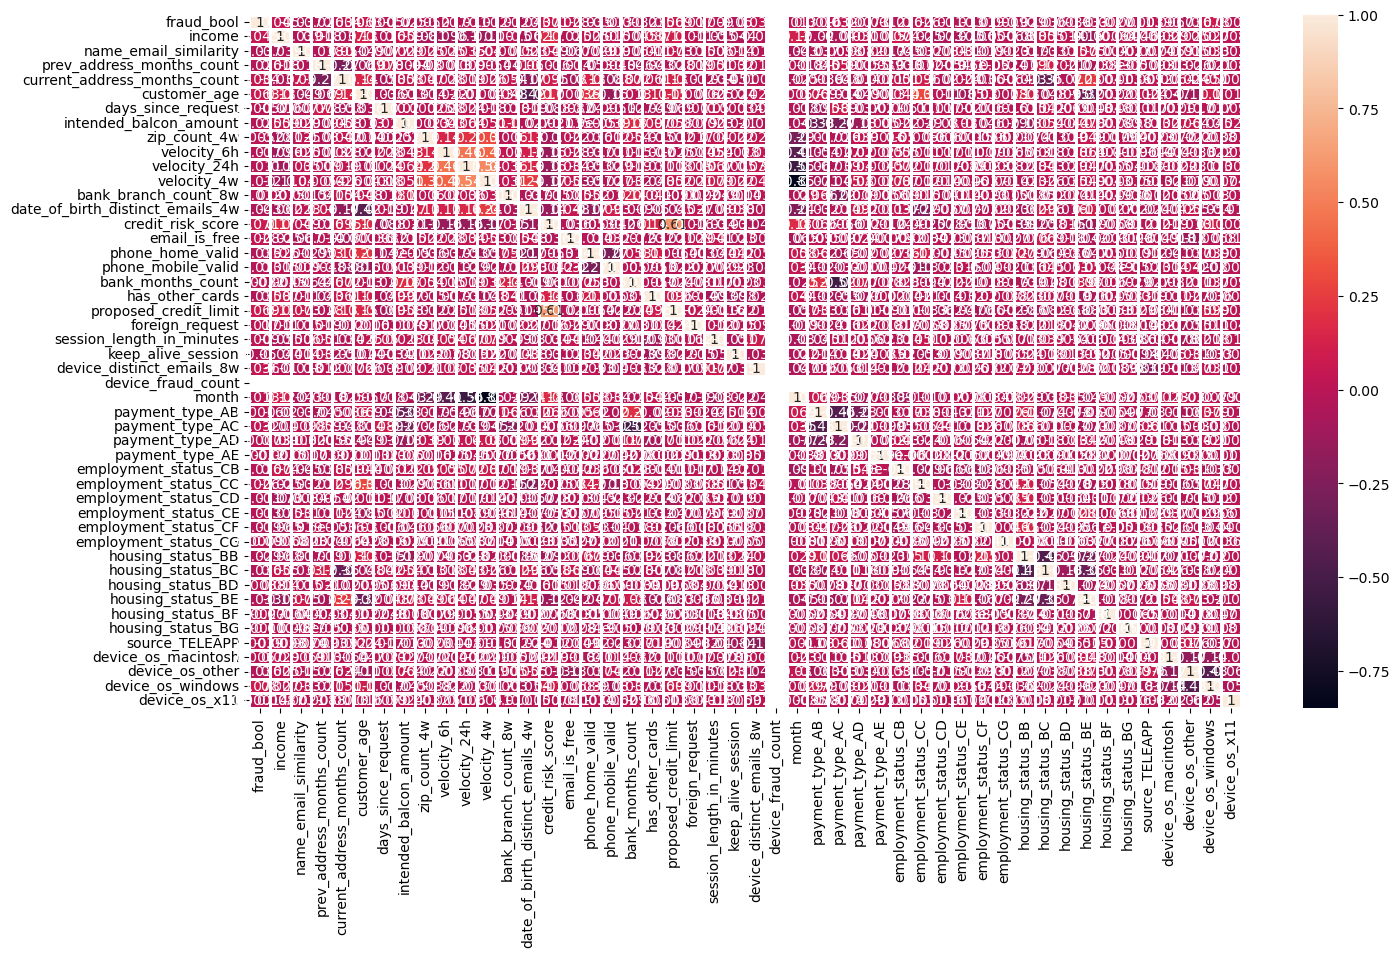

In [ ]:
plt.figure(figsize=(16, 9))
ax = sns.heatmap(corr, annot=True, linewidths=2)

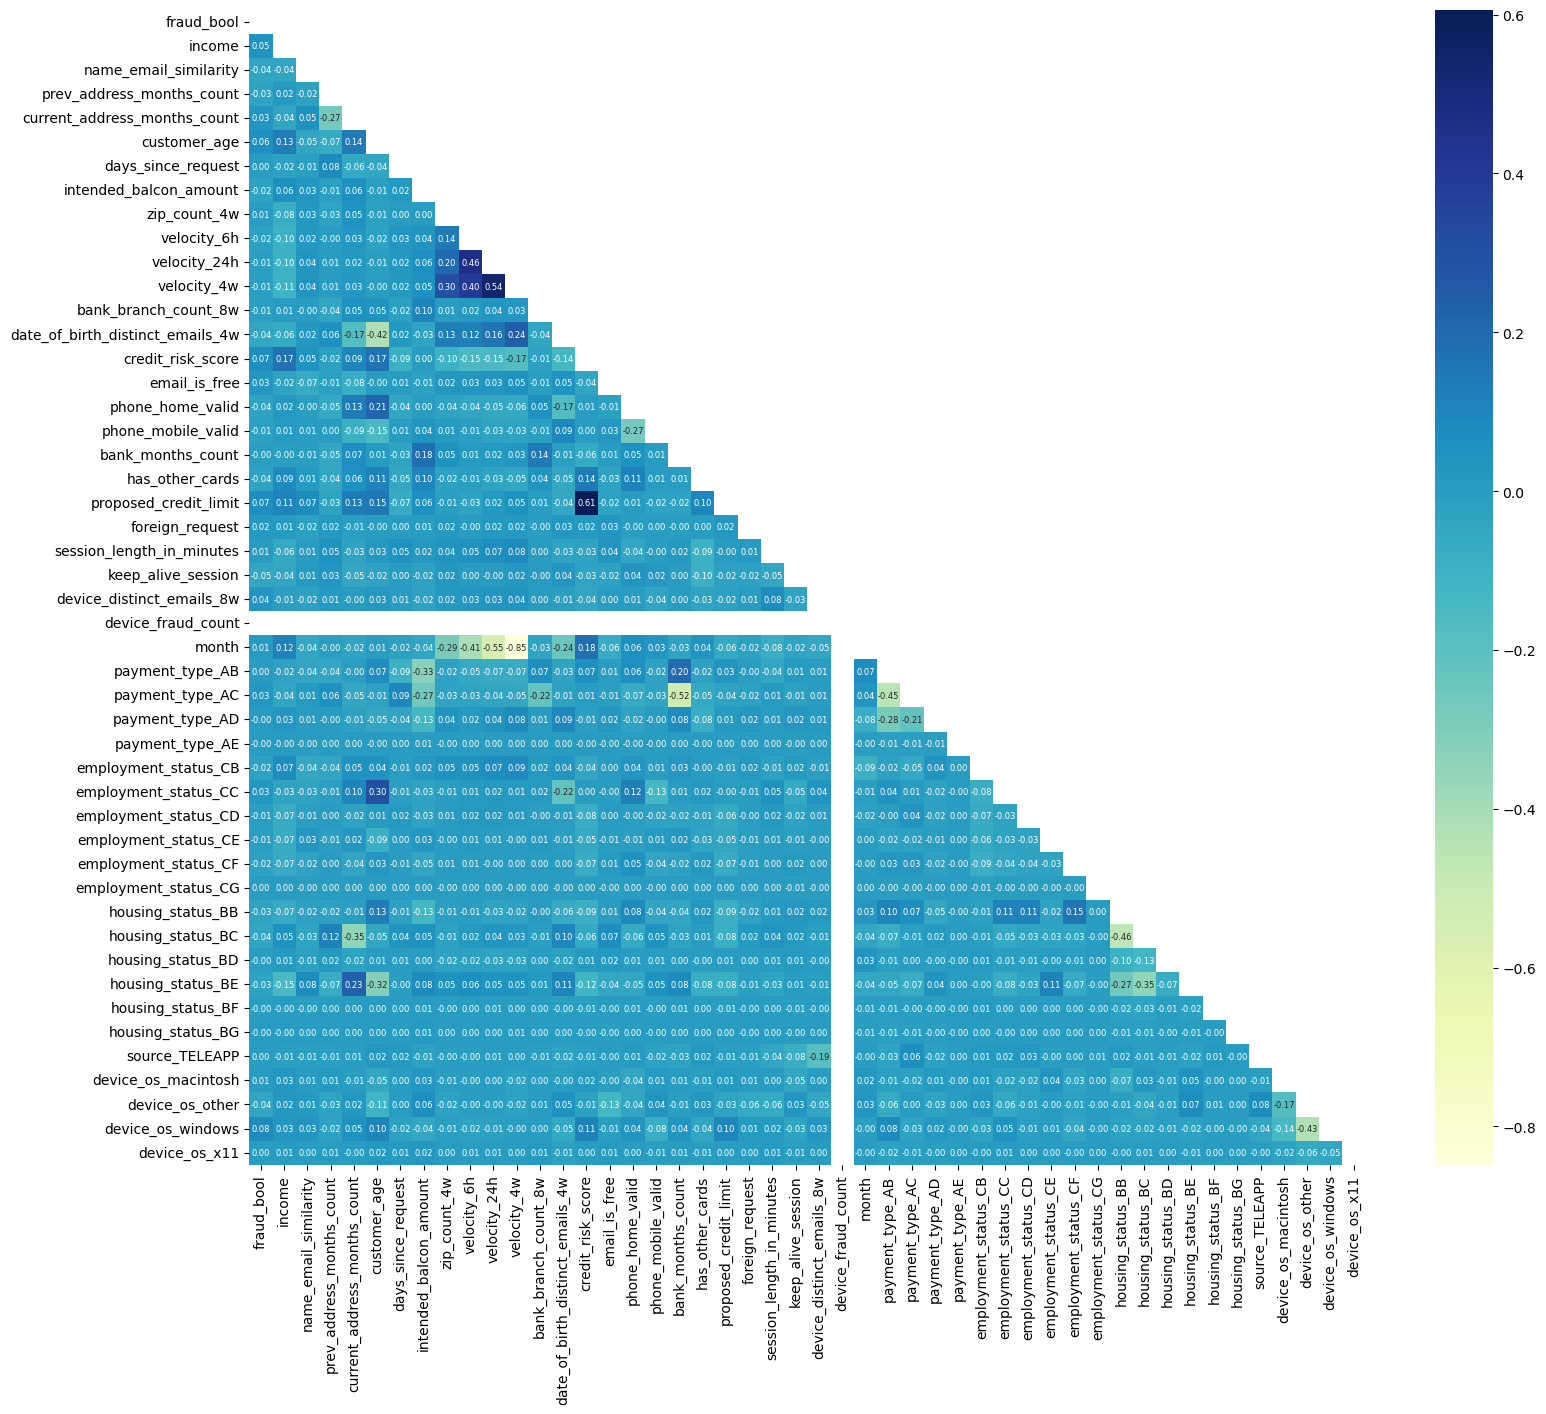

In [ ]:
plt.figure(figsize=(18, 15))
mask = np.triu(np.ones_like(corr))
heatmap = sns.heatmap(corr, mask=mask, annot=True, cmap=plt.cm.YlGnBu, annot_kws={"fontsize": 6}, fmt=".2f")  # Set fmt to ".2f" to display 2 decimals
plt.show()

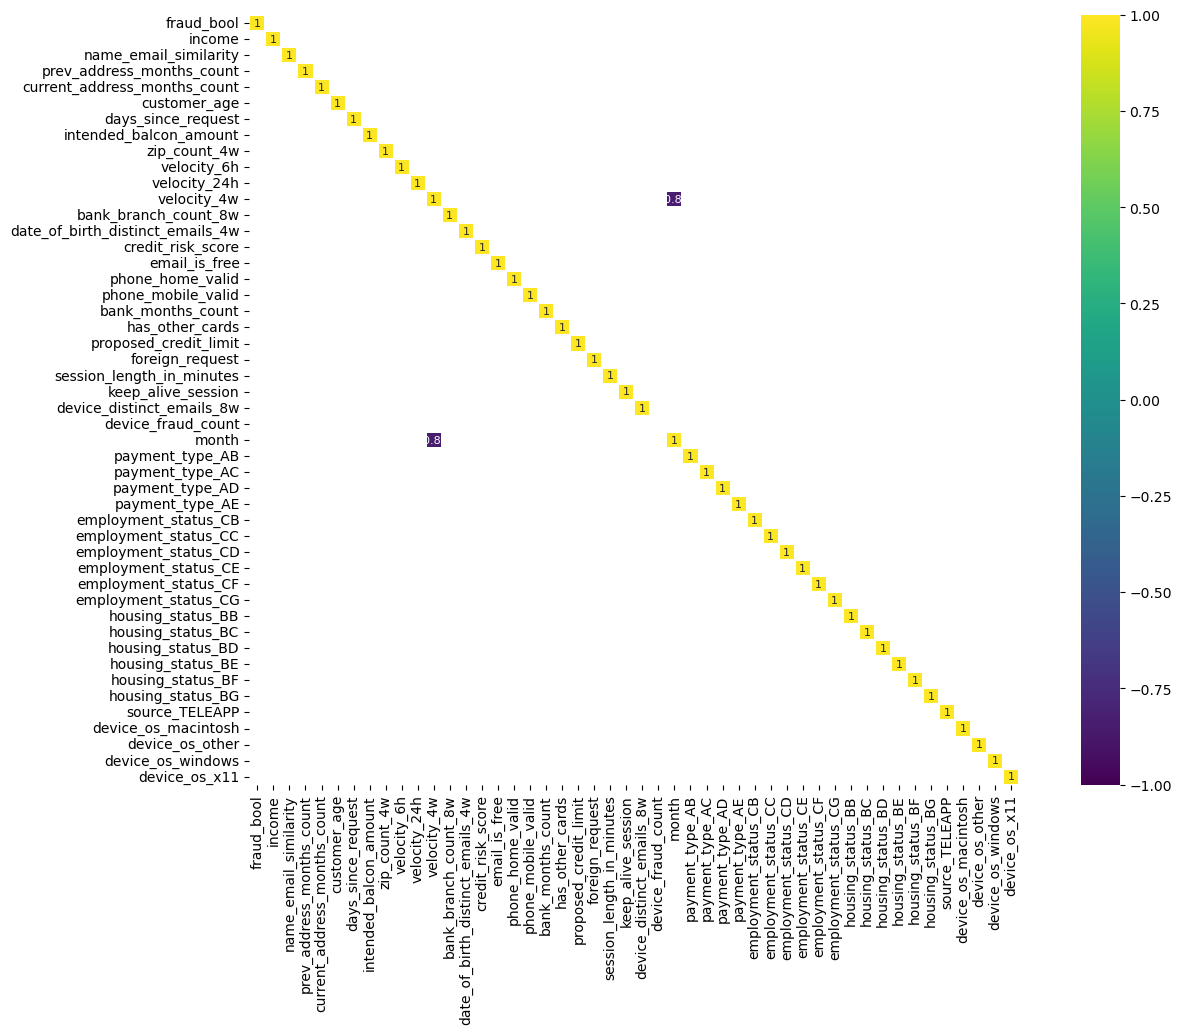

In [ ]:
#check multicollinearity
plt.figure(figsize=(16, 10))

sns.heatmap(corr[(corr >= 0.8) | (corr <= -0.8)],
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

## **Numerical data distribution and Outliers**

For this part lets look at the distribution of all of the features by ploting them

To do so lets first list all the types of our data from our dataset and take only the numerical ones:

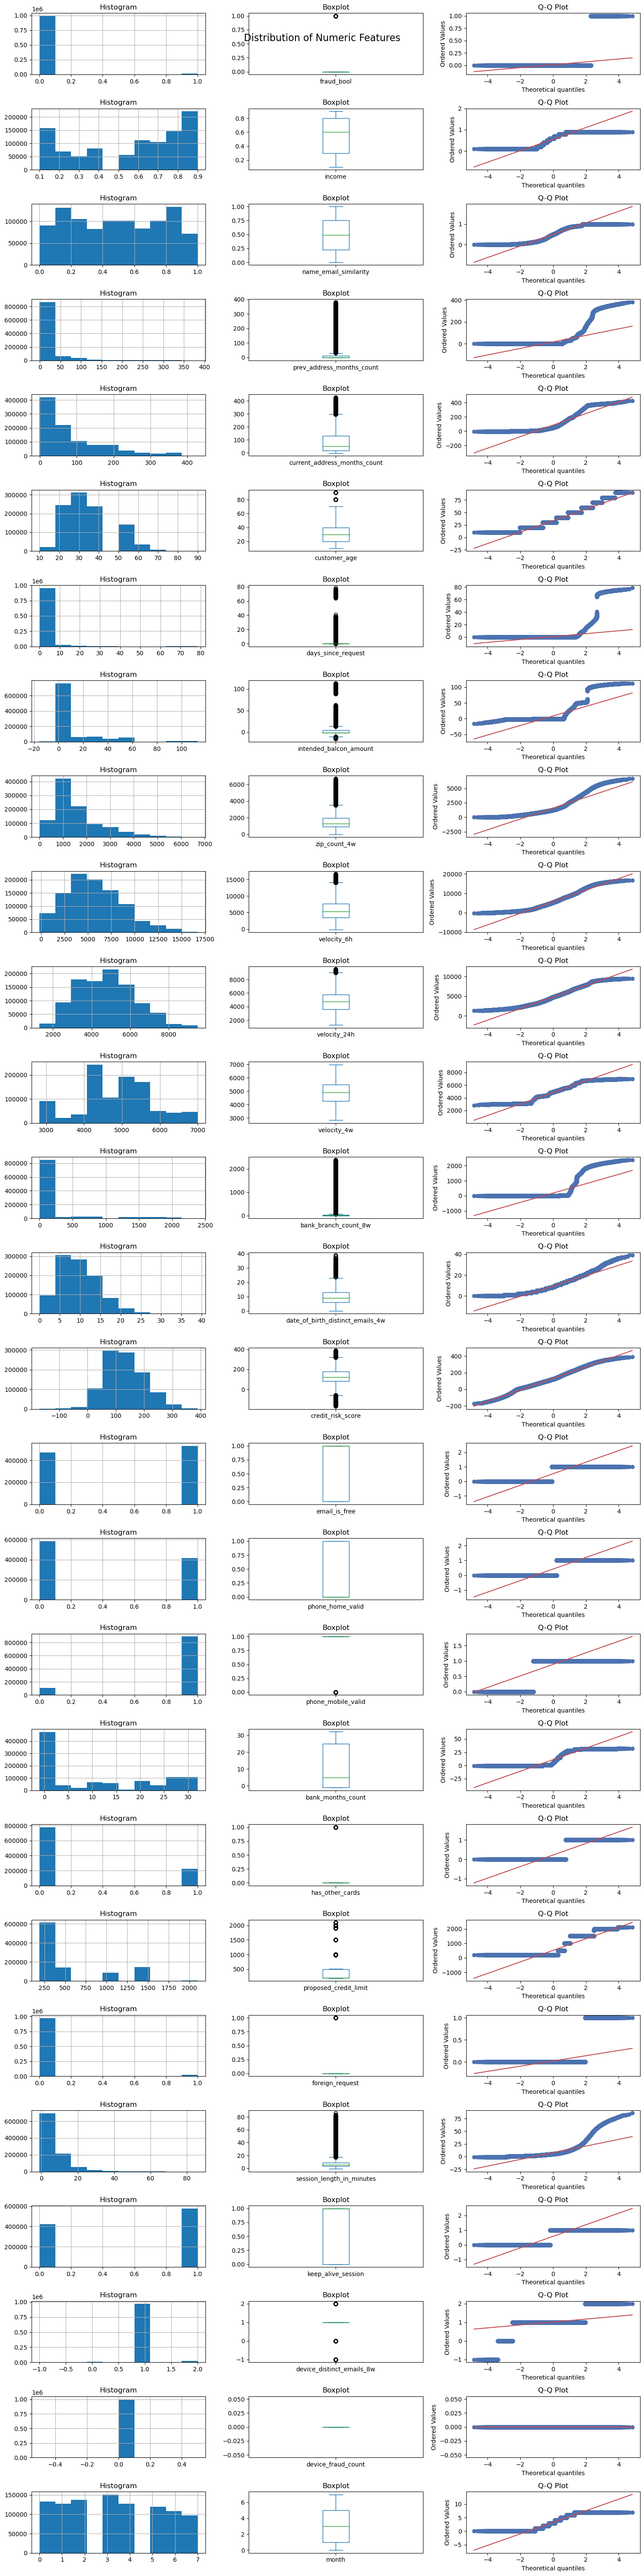

In [ ]:
# Create figure and grid
fig, axes = plt.subplots(27, 3, figsize=(15,60))
fig.suptitle('Distribution of Numeric Features', fontsize=16)

# Loop through features
for i, col in enumerate(num_df.columns):

    # Histogram
    ax1 = axes[i, 0]
    num_df[col].hist(ax=ax1)
    ax1.set_title('Histogram')

    # Boxplot
    ax2 = axes[i, 1]
    num_df[col].plot(kind='box', ax=ax2)
    ax2.set_title('Boxplot')

    # Q-Q Plot
    ax3 = axes[i, 2]
    stats.probplot(num_df[col],
                  dist="norm",
                  plot=ax3)
    ax3.set_title('Q-Q Plot')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

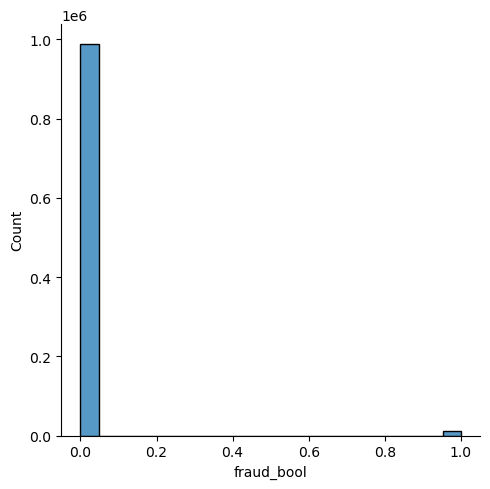

Column: fraud_bool
Skewness: 9.36383824730001
Kurtosis: 85.68163808487074


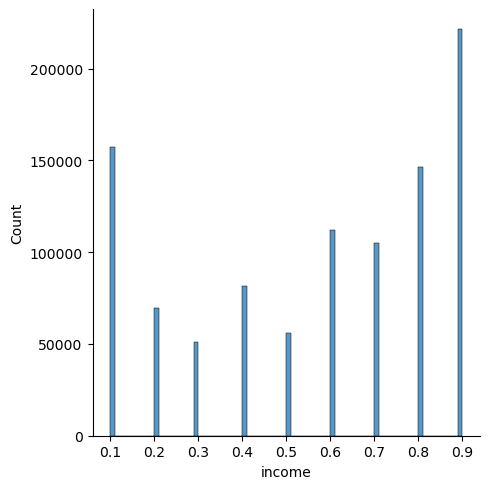

Column: income
Skewness: -0.3863374117420346
Kurtosis: -1.2993664445074034


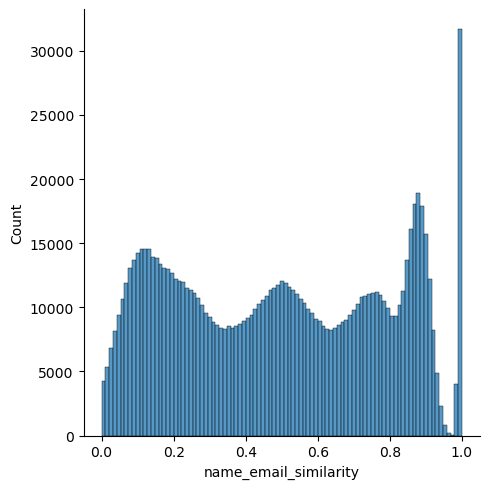

Column: name_email_similarity
Skewness: 0.042839498905382946
Kurtosis: -1.2802792132245566


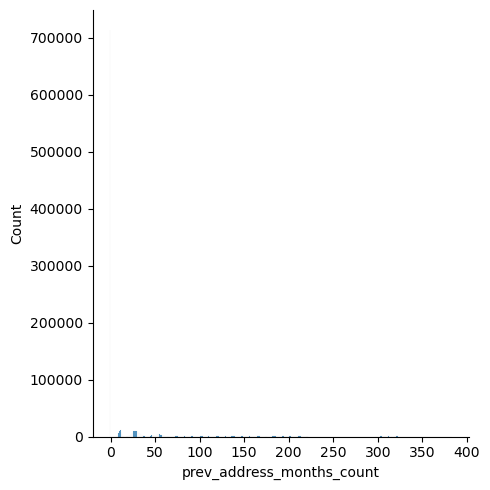

Column: prev_address_months_count
Skewness: 4.063888213067735
Kurtosis: 20.031089170871116


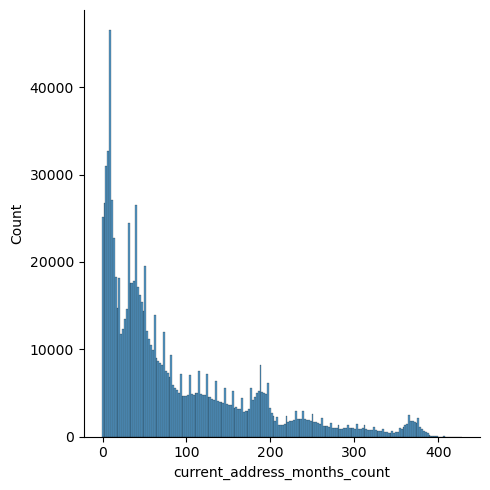

Column: current_address_months_count
Skewness: 1.3869977002720855
Kurtosis: 1.356864604786343


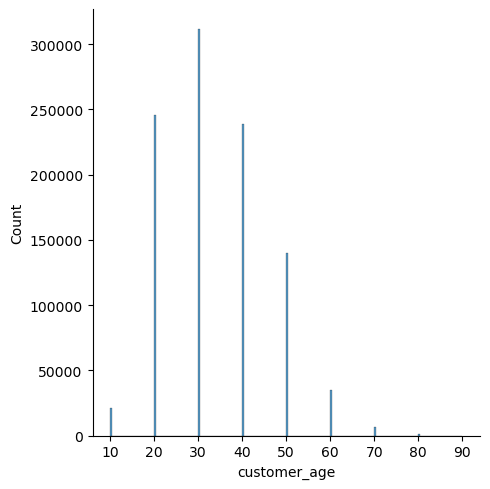

Column: customer_age
Skewness: 0.47807881416937026
Kurtosis: -0.11520328912974165


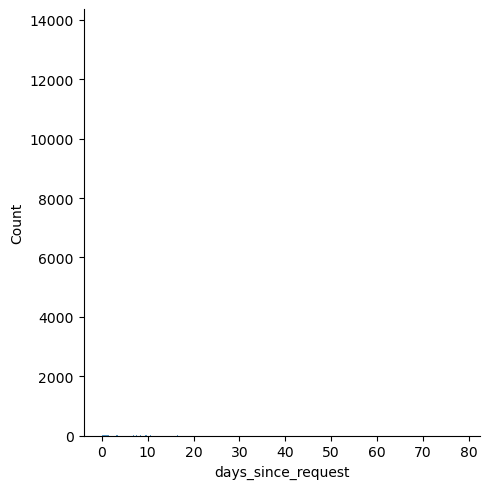

Column: days_since_request
Skewness: 9.278954590837492
Kurtosis: 106.56921373544338


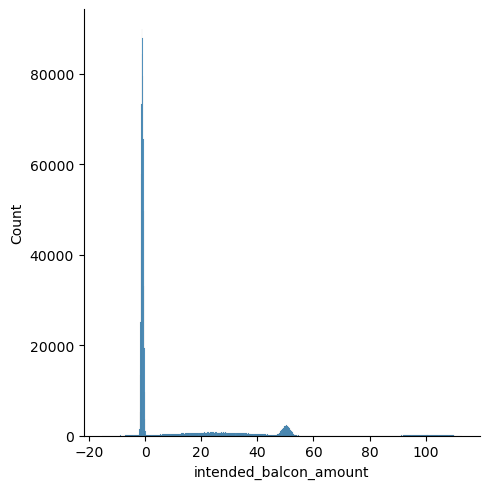

Column: intended_balcon_amount
Skewness: 2.507173389827796
Kurtosis: 6.846670571036354


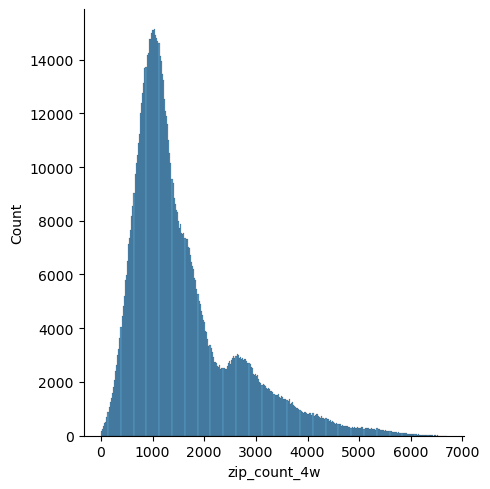

Column: zip_count_4w
Skewness: 1.4566566365892104
Kurtosis: 2.139983496302859


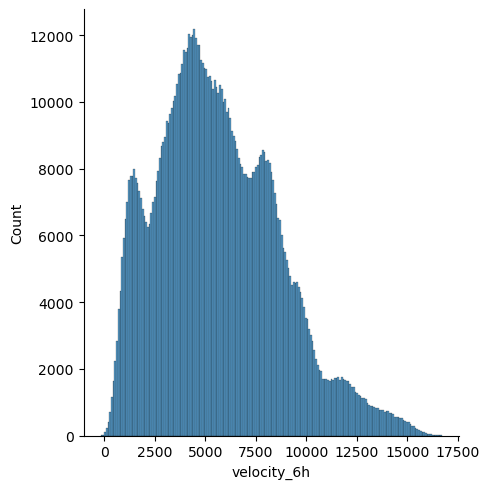

Column: velocity_6h
Skewness: 0.5626820852821449
Kurtosis: 0.0029981023601783896


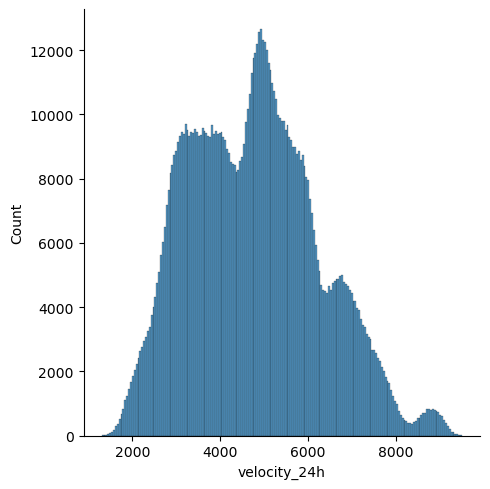

Column: velocity_24h
Skewness: 0.3311335573391923
Kurtosis: -0.3736538852954059


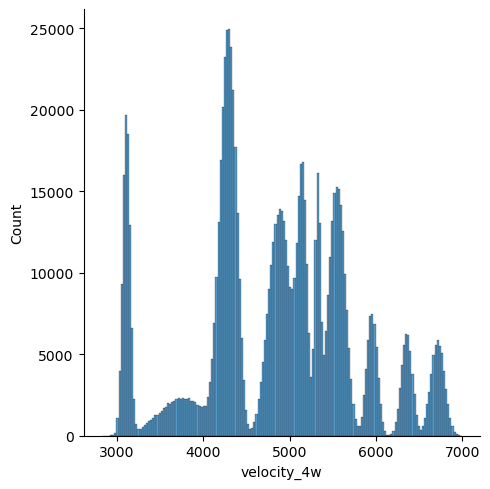

Column: velocity_4w
Skewness: -0.060124770741741954
Kurtosis: -0.35962526196934164


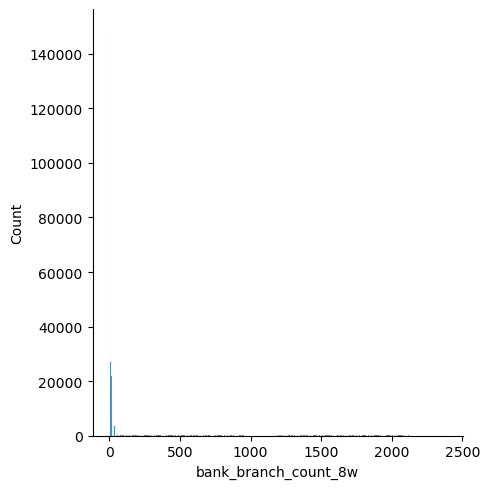

Column: bank_branch_count_8w
Skewness: 2.7471608118971105
Kurtosis: 6.502920812286305


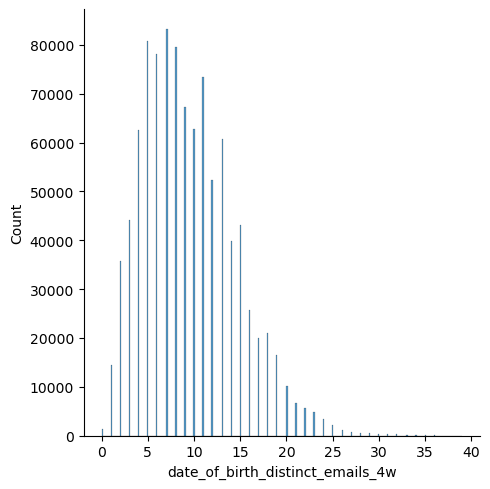

Column: date_of_birth_distinct_emails_4w
Skewness: 0.7032498654199967
Kurtosis: 0.43644938656107213


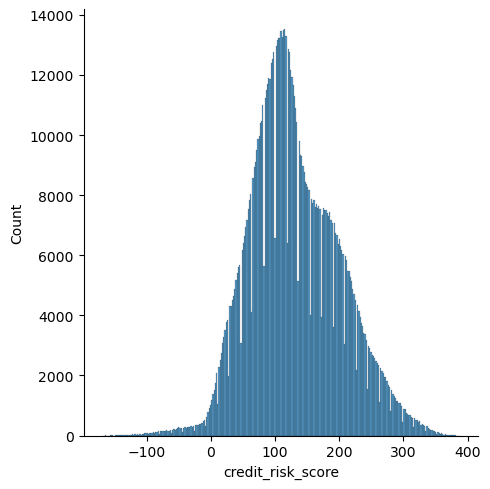

Column: credit_risk_score
Skewness: 0.2958953785899286
Kurtosis: 0.06808748461385328


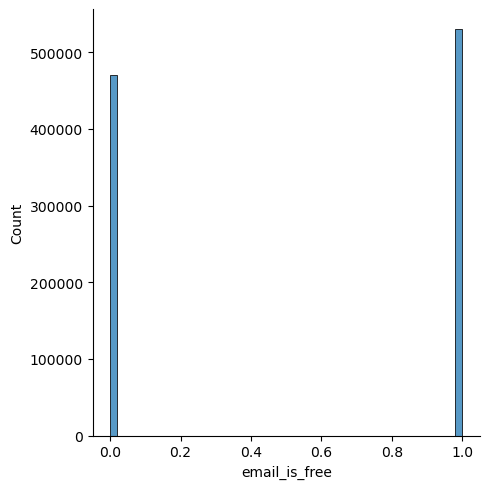

Column: email_is_free
Skewness: -0.11975830049481816
Kurtosis: -1.985661920790435


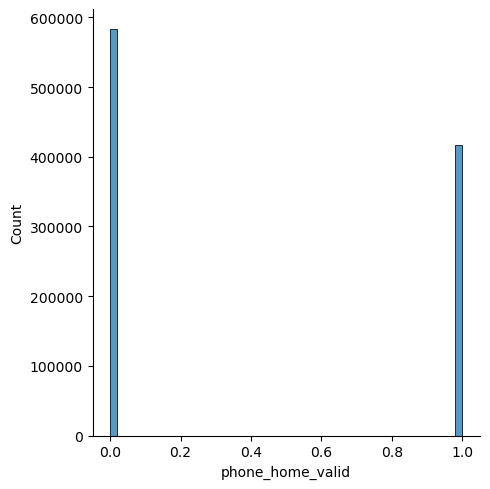

Column: phone_home_valid
Skewness: 0.33635039078576906
Kurtosis: -1.8868721883666368


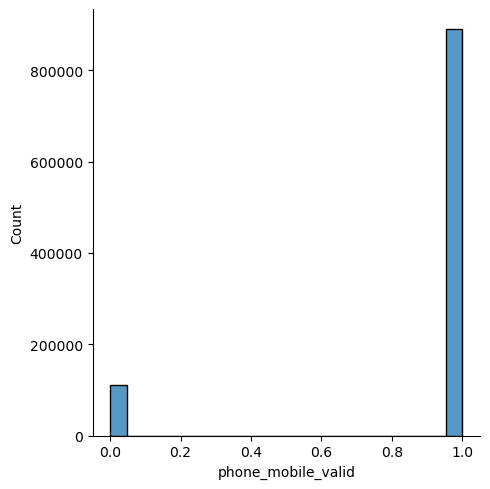

Column: phone_mobile_valid
Skewness: -2.4876161537386516
Kurtosis: 4.188242504822492


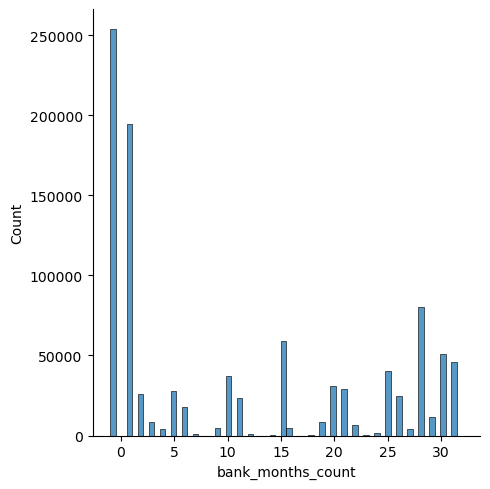

Column: bank_months_count
Skewness: 0.488746999370208
Kurtosis: -1.4362302209010127


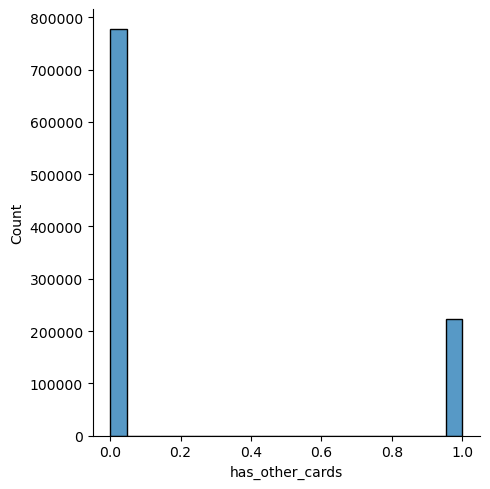

Column: has_other_cards
Skewness: 1.330989473680287
Kurtosis: -0.2284674778912268


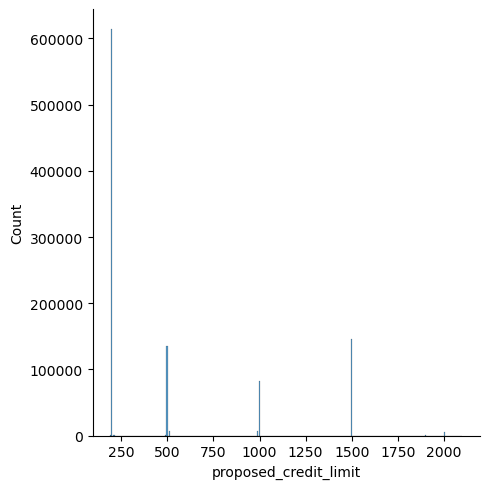

Column: proposed_credit_limit
Skewness: 1.3014099769019405
Kurtosis: 0.1688385807775239


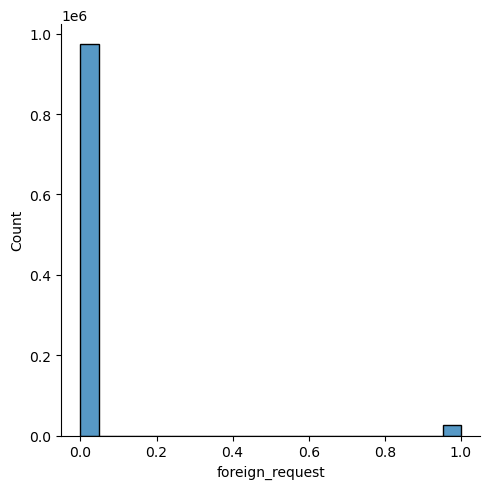

Column: foreign_request
Skewness: 6.053306348433899
Kurtosis: 34.64258703316026


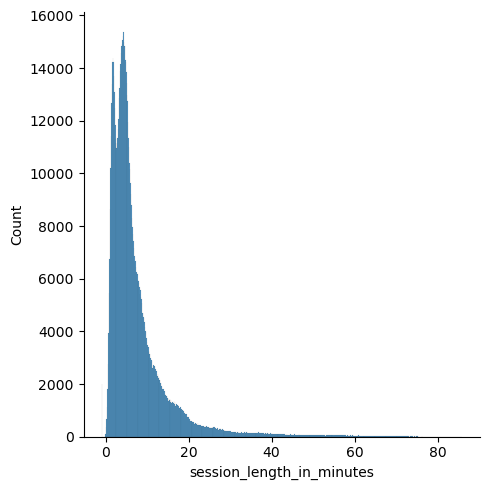

Column: session_length_in_minutes
Skewness: 3.3045750107828953
Kurtosis: 14.961305120802502


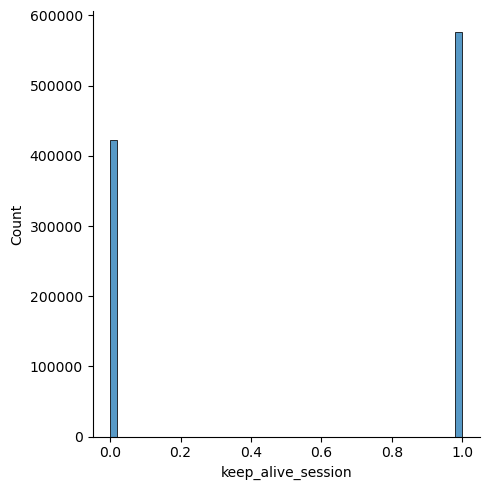

Column: keep_alive_session
Skewness: -0.311499239068318
Kurtosis: -1.9029720300079185


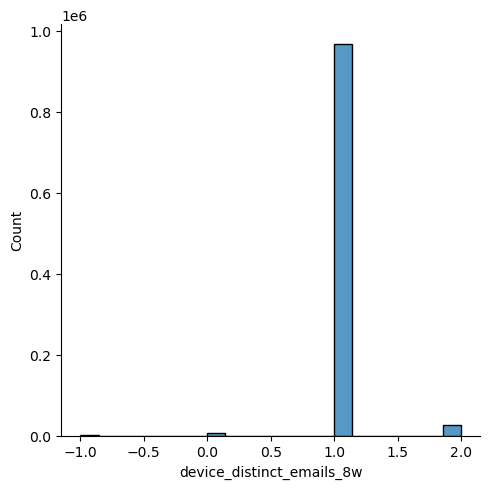

Column: device_distinct_emails_8w
Skewness: 2.430764006038204
Kurtosis: 30.907410899612163


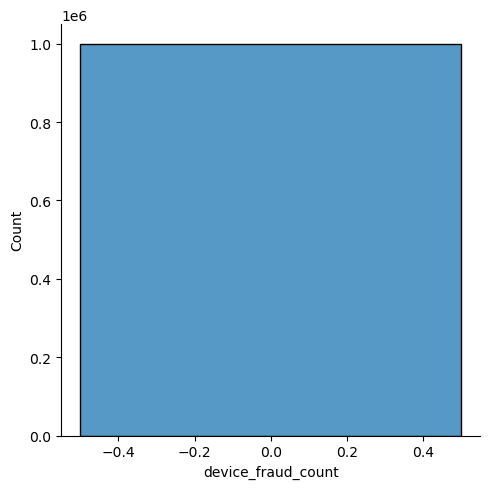

Column: device_fraud_count
Skewness: 0
Kurtosis: 0


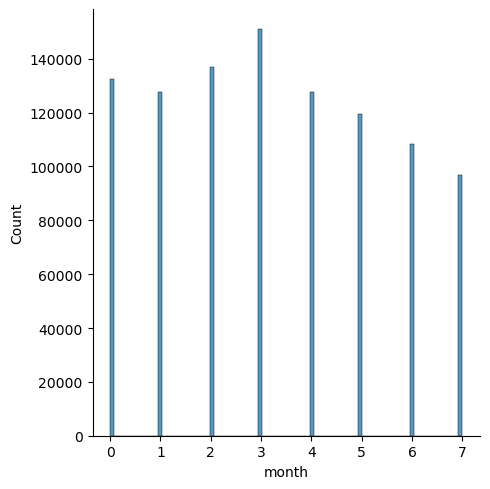

Column: month
Skewness: 0.11239627697398688
Kurtosis: -1.1283322102479783


In [ ]:
for col in num_df.columns:

    # Plot histogram
    sns.displot(num_df[col], kind="hist")
    plt.show()

    # Check skewness
    skew = num_df[col].skew()

    # Check kurtosis
    kurt = num_df[col].kurt()

    print(f"Column: {col}")
    print(f"Skewness: {skew}")
    print(f"Kurtosis: {kurt}")

- The fraud_bool feature is highly skewed towards 0 (non-fraud), as we would expect from an imbalanced target variable.

- Many features like prev_address_months_count, days_since_request , intended_balcon_amount, and zip_count_4w have high positive skewness, indicating long tails to the right of the distribution.

- Features like phone_mobile_valid and device_distinct_emails_8w have very high skewness values, suggesting extreme outliers.

- Many features have negative kurtosis values, indicating platykurtic or flatter distributions with fewer outliers than normal.

- Some features like days_since_request, device_distinct_emails_8w and foreign_request have very high positive kurtosis, indicating heavy-tailed, leptokurtic distributions with many outliers.

- Features like device_fraud_count have skewness and kurtosis of 0, indicating a symmetric distribution with no outliers.

Caution is needed when removing outliers from imbalanced data.
Outliers may contain useful information or represent rare instances of the minority class.

**Their removal risks:**

- Information loss
- Distorting the class distribution
- Introducing bias favoring the majority class
- Diverging from real-world scenarios


**In summary, this reveals:**

- Many features have skewed or heavy-tailed distributions that may need transformation before modeling  (such as log transformation).

- Some features likely contain outliers that require investigation and handling but the context of imbalanced data can pose challenges.

- The class imbalance in fraud_bool suggests oversampling or undersampling may be needed.

# **1- Applying Hyperparameter Tuning on the Baseline Models and adding 2 more models**

First we will search for hyperparameters and train the baseline model and adding 2 more models then compare between them and at the end we apply the best preprocessing on the best model with the best hyperparameters.

In [ ]:
df = pd.read_csv('Fraud Detection/neurips-2022/Base.csv')

## **Train-Test-Split**

In [ ]:
# Split data into features and target
X = df.drop(['fraud_bool'], axis=1)
y = df['fraud_bool']

# Train test split by 'month', month 0-5 are train, 6-7 are test data as proposed in the paper
X_train = X[X['month']<6]
X_test = X[X['month']>=6]
y_train = y[X['month']<6]
y_test = y[X['month']>=6]

X_train.drop('month', axis=1, inplace=True)
X_test.drop('month', axis=1, inplace=True)

# alternativly: regular train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **OneHotEncode on all the categorical features**
Find all the columns containing categorical features

In [ ]:
s = (X_train.dtypes == 'object') # list of column-names and wether they contain categorical features
object_cols = list(s[s].index) # All the columns containing these features
print(X[object_cols])

       payment_type employment_status housing_status    source  device_os
0                AA                CA             BA  INTERNET    windows
1                AB                CA             BA  INTERNET    windows
2                AC                CB             BA  INTERNET      other
3                AB                CA             BA  INTERNET      linux
4                AB                CA             BA  INTERNET  macintosh
...             ...               ...            ...       ...        ...
999995           AB                CA             BC  INTERNET      linux
999996           AC                CC             BC  INTERNET    windows
999997           AA                CF             BC  INTERNET      other
999998           AA                CA             BA  INTERNET    windows
999999           AA                CA             BE  INTERNET      linux

[1000000 rows x 5 columns]


In [ ]:
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore') # ignore any features in the test set that were not present in the training set

# Get one-hot-encoded columns
ohe_cols_train = pd.DataFrame(ohe.fit_transform(X_train[object_cols]))
ohe_cols_test = pd.DataFrame(ohe.transform(X_test[object_cols]))

# Set the index of the transformed data to match the original data
ohe_cols_train.index = X_train.index
ohe_cols_test.index = X_test.index

# Remove the object columns from the training and test data
num_X_train = X_train.drop(object_cols, axis=1)
num_X_test = X_test.drop(object_cols, axis=1)

# Concatenate the numerical data with the transformed categorical data
X_train = pd.concat([num_X_train, ohe_cols_train], axis=1)
X_test = pd.concat([num_X_test, ohe_cols_test], axis=1)

# Newer versions of sklearn require the column names to be strings
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

# See that it replaced all categorical values
X_train.head(1)

income  name_email_similarity  prev_address_months_count   
96843     0.8               0.153411                         -1  \

       current_address_months_count  customer_age  days_since_request   
96843                           105            30            0.003467  \

       intended_balcon_amount  zip_count_4w  velocity_6h  velocity_24h   
96843                -0.90684          1779   1147.61599   3076.384487  \

       velocity_4w  bank_branch_count_8w  date_of_birth_distinct_emails_4w   
96843  5071.278793                     0                                 7  \

       credit_risk_score  email_is_free  phone_home_valid  phone_mobile_valid   
96843                102              1                 0                   1  \

       bank_months_count  has_other_cards  proposed_credit_limit   
96843                 -1                0                  200.0  \

       foreign_request  session_length_in_minutes  keep_alive_session   
96843                0                   3.911696                   0  \

       device_distinct_emails_8w  device_fraud_count    0    1    2    3    4   
96843                          1                   0  0.0  0.0  1.0  0.0  0.0  \

         5    6    7    8    9   10   11   12   13   14   15   16   17   18   
96843  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  \

        19   20   21   22   23   24   25  
96843  1.0  0.0  1.0  0.0  0.0  0.0  0.0

In [ ]:
# Scale data to improve performance on some models
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## **Model Evaluation Functions**
Frequantly used utility functions that are partly taken from a notebook by the dataset creator on model evaluation.

In [ ]:
test_df = df[df["month"]>=6]
labels = test_df["fraud_bool"]
groups = (test_df["customer_age"] > 50).map({True: ">50", False: "<=50"})

def get_fairness_metrics(
    y_true, y_pred, groups, FIXED_FPR
):
    g = Group()
    aequitas_df = pd.DataFrame(
        {"score": y_pred,
         "label_value": y_true,
         "group": groups}
    )
    # Use aequitas to compute confusion matrix metrics for every group.
    disparities_df = g.get_crosstabs(aequitas_df, score_thresholds={"score_val": [FIXED_FPR]})[0]

    # Predictive equality is the differences in FPR (we use ratios in the paper)
    predictive_equality = disparities_df["fpr"].min() / disparities_df["fpr"].max()

    return predictive_equality, disparities_df

In [ ]:
# plot the false-positive rate of a model compared to the true-positive rate (ROC-Curves)
def plot_roc(fpr, tpr):
    plt.plot(fpr, tpr, label='ROC curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve')
    plt.legend()
    plt.show()

In [ ]:
def evaluate(predictions, y_test, FIXED_FPR=0.05):
    """
    Evaluates the predictions of a binary classifier using various metrics.
    """
    fprs, tprs, thresholds = roc_curve(y_test, predictions)
    plot_roc(fprs, tprs)
    tpr = tprs[fprs < FIXED_FPR][-1]
    fpr = fprs[fprs < FIXED_FPR][-1]
    threshold = thresholds[fprs < FIXED_FPR][-1]

    print("AUC:", roc_auc_score(y_test, predictions))
    to_pct = lambda x: str(round(x, 4) * 100) + "%"
    print("TPR: ", to_pct(tpr), "\nFPR: ", to_pct(fpr), "\nThreshold: ", round(threshold, 2))
    predictive_equality, disparities_df = get_fairness_metrics(y_test, predictions, groups, FIXED_FPR)
    print("Predictive Equality: ", to_pct(predictive_equality))

    binary_predictions = (predictions >= threshold).astype(int)
    precision = precision_score(y_test, binary_predictions)
    recall = recall_score(y_test, binary_predictions)
    f1 = f1_score(y_test, binary_predictions)

    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")

## **Model Creation**
## **Baseline Models & Hyperparameter Tuning**
Trying some baseline models with its Hyperparameter Tuning to estimate a the score. Note that class-wheights are set for all the models to achieve higher predictive equality

### **Baseline RandomForest Classifier**

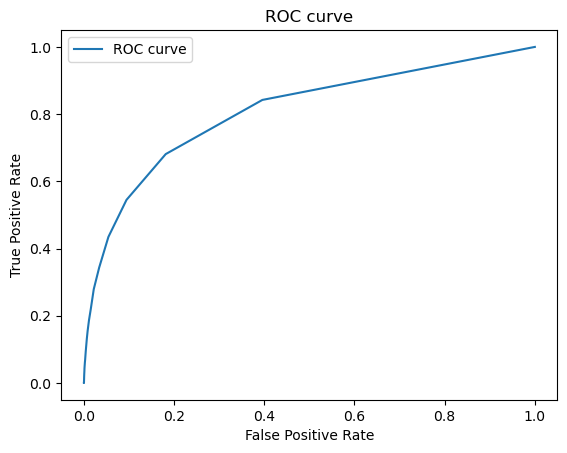

AUC: 0.8082770351834927
TPR:  34.33% 
FPR:  3.38% 
Threshold:  0.05
Predictive Equality:  33.72%
Precision: 0.1264720942140297
Recall: 0.34329395413481584
F1 Score: 0.18484565014031806


In [ ]:
rf_model = RandomForestClassifier(class_weight='balanced')
rf_model.fit(X_train, y_train)
predictions = rf_model.predict_proba(X_test)[:,1]
evaluate(predictions,y_test)

### **RandomForest Classifier using random Search to apply hyperparameter tuning.**

In [ ]:
# Define the parameter distribution for Random Search
param_dist = {
  'n_estimators': [100, 500, 1000],
  'max_depth': [3, 5, 7, 9],
  'class_weight': [None, 'balanced', 'balanced_subsample']
}

# Run Random Search with cross-validation
rfc = RandomForestClassifier()
random_search = RandomizedSearchCV(rfc, param_distributions=param_dist, n_iter=10,random_state=42,scoring='roc_auc')
random_search.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'class_weight': [None, 'balanced',
                                                         'balanced_subsample'],
                                        'max_depth': [3, 5, 7, 9],
                                        'n_estimators': [100, 500, 1000]},
                   random_state=42, scoring='roc_auc')

In [ ]:
# Get the best hyperparameters and their corresponding score
best_params = random_search.best_params_
best_score = random_search.best_score_

# Print the best hyperparameters and their corresponding score
print(f"Best hyperparameters: {best_params}")
print(f"Best score: {best_score}")

Best hyperparameters: {'n_estimators': 1000, 'max_depth': 9, 'class_weight': 'balanced_subsample'}
Best score: 0.8740771456187577


In [ ]:
# Use the best hyperparameters to train a new classifier
best_clf = RandomForestClassifier(**best_params)
best_clf.fit(X_train, y_train)

# Use the trained classifier to make predictions on the test data
y_pred = best_clf.predict(X_test)

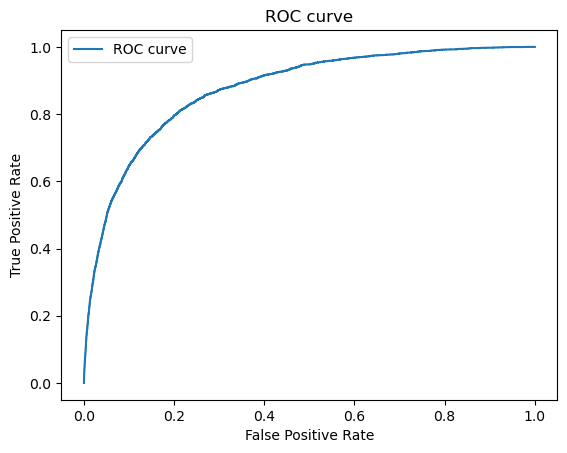

AUC: 0.8753808646765568
TPR:  49.41% 
FPR:  5.0% 
Threshold:  0.67
Predictive Equality:  99.35000000000001%
Precision: 0.12342678586928219
Recall: 0.49409312022237667
F1 Score: 0.1975137162302938


In [ ]:
predictions_clf = best_clf.predict_proba(X_test)[:,1]
evaluate(predictions_clf,y_test)

### **Observation**


hyperparameter tuning improved the model performance as seen by the increase in AUC from 0.808 to 0.875 and increase in TPR from 34.33% to 49.41%. The precision, recall, and F1 score also improved after hyperparameter tuning.

### **Baseline logistic regression model**

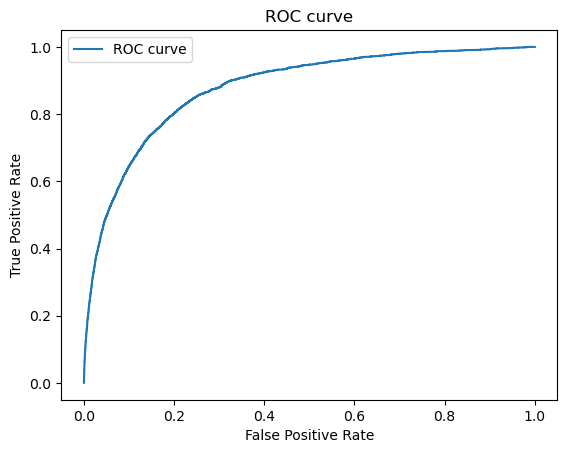

AUC: 0.8779388959897662
TPR:  49.69% 
FPR:  5.0% 
Threshold:  0.76
Predictive Equality:  89.52%
Precision: 0.12401352874859076
Recall: 0.49687282835302293
F1 Score: 0.19848705670067318


In [ ]:
lr_model = LogisticRegression(
    class_weight='balanced'
)
lr_model.fit(X_train, y_train)

predictions = lr_model.predict_proba(X_test)[:,1]
evaluate(predictions,y_test)

### **LogisticRegression Classifier using random Search to apply hyperparameter tuning.**

In [ ]:
# Define the parameter distribution for Random Search
param_dist = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear'],
    'max_iter': [100, 500],
    'fit_intercept': [True, False],
    'class_weight': [None, 'balanced'],

}

# Create a logistic regression object
lr = LogisticRegression()

# Create a RandomizedSearchCV object with the parameter distribution and number of iterations
random_search = RandomizedSearchCV(lr, param_distributions=param_dist, n_iter=10,n_jobs=-1,scoring='roc_auc')

# Fit the RandomizedSearchCV object to the data
random_search.fit(X_train, y_train)

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1173: F

RandomizedSearchCV(estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions={'class_weight': [None, 'balanced'],
                                        'fit_intercept': [True, False],
                                        'max_iter': [100, 500],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    'none'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear']},
                   scoring='roc_auc')

In [ ]:
# Get the best hyperparameters and their corresponding score
best_params = random_search.best_params_
best_score = random_search.best_score_

# Print the best hyperparameters and their corresponding score
print(f"Best hyperparameters: {best_params}")
print(f"Best score: {best_score}")

Best hyperparameters: {'solver': 'liblinear', 'penalty': 'l2', 'max_iter': 500, 'fit_intercept': True, 'class_weight': None}
Best score: 0.8697883025331763


In [ ]:
# Use the best hyperparameters to train a new logistic regression model
best_lr = LogisticRegression(**best_params)
best_lr.fit(X_train, y_train)

# Use the trained model to make predictions on the test data
y_pred = best_lr.predict(X_test)

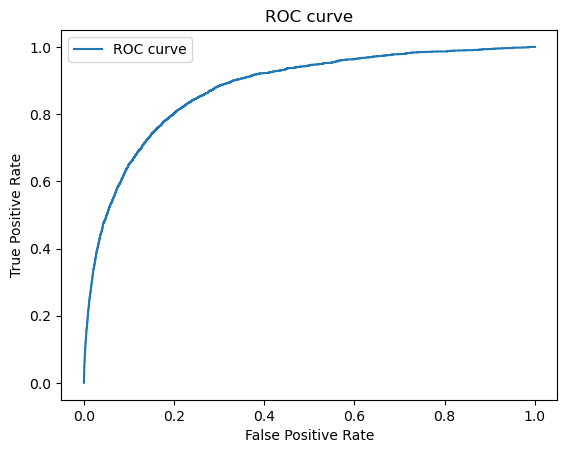

AUC: 0.8776090537846802
TPR:  49.830000000000005% 
FPR:  4.99% 
Threshold:  0.03
Predictive Equality:  28.04%
Precision: 0.1243712055507372
Recall: 0.4982626824183461
F1 Score: 0.19905607995558025


In [ ]:
predictions_lr = best_lr.predict_proba(X_test)[:,1]
evaluate(predictions_lr,y_test)

### **Observation**

there were only marginal improvements after hyperparameter tuning of the logistic regression model:

- The AUC and F1 score increased slightly
- The TPR and FPR changed by less than 0.2%
- The predictive equality decreased significantly
- The precision and recall also increased slightly

### **Baseline XGBclassifier**

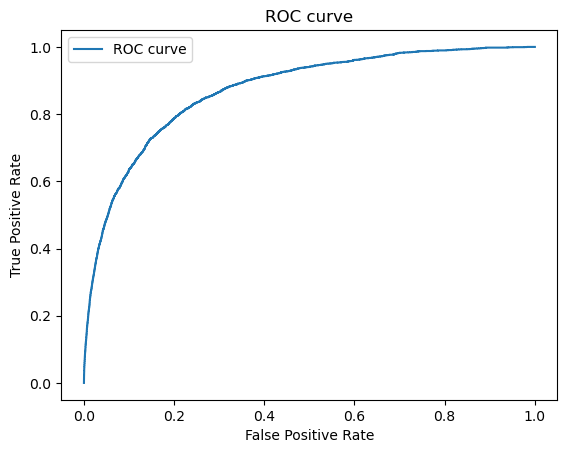

AUC: 0.8718540084797579
TPR:  48.78% 
FPR:  5.0% 
Threshold:  0.71
Predictive Equality:  74.38%
Precision: 0.12198088618592529
Recall: 0.48783877692842254
F1 Score: 0.19516263552960803


In [ ]:
model = XGBClassifier(
    tree_method='gpu_hist', gpu_id=0,
    scale_pos_weight=89.67005
)
model.fit(X_train, y_train)

predictions = model.predict_proba(X_test)[:,1]
evaluate(predictions,y_test)

###  **XGBClassifier using random Search to apply hyperparameter tuning.**

In [ ]:
# Define the parameter distribution for Random Search
param_dist = {
    'tree_method': ['gpu_hist', 'gpu_exact', 'hist', 'approx'],
    'gpu_id': [0, 1, 2],
    'scale_pos_weight': [1, 2, 5, 10]
}

# Create an XGBClassifier object
xgb = XGBClassifier()

# Create a RandomizedSearchCV object with the parameter distribution and number of iterations
random_search = RandomizedSearchCV(xgb, param_distributions=param_dist, n_iter=10,n_jobs=-1,scoring='roc_auc')

# Fit the RandomizedSearchCV object to the data
random_search.fit(X_train, y_train)

[10:21:49] WARNING: ../src/learner.cc:347: Only 1 GPUs are visible, setting `gpu_id` to 0


RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None...
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None, ...),
                   n_jobs=-1,
                   param_distributions={'gpu_id': [0, 1, 2],
                                        'scale_pos_weight': [1, 2, 5, 10],
                                        'tree_method': ['gpu_hist', 'gpu_exact',
                                                        'hist', 'approx']},
                   scoring='roc_auc')

In [ ]:
# Get the best hyperparameters and their corresponding score
best_params = random_search.best_params_
best_score = random_search.best_score_

# Print the best hyperparameters and their corresponding score
print(f"Best hyperparameters: {best_params}")
print(f"Best score: {best_score}")

Best hyperparameters: {'tree_method': 'gpu_hist', 'scale_pos_weight': 1, 'gpu_id': 1}
Best score: 0.8786831687559593


In [ ]:
# Use the best hyperparameters to train a new XGBClassifier model
best_xgb = XGBClassifier(**best_params)
best_xgb.fit(X_train, y_train)

# Use the trained model to make predictions on the test data
y_pred = best_xgb.predict(X_test)

[10:24:47] WARNING: ../src/learner.cc:347: Only 1 GPUs are visible, setting `gpu_id` to 0


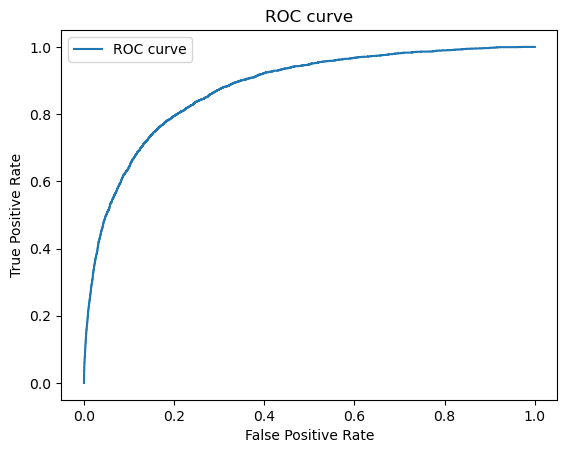

AUC: 0.8771345444132284
TPR:  50.13999999999999% 
FPR:  4.99% 
Threshold:  0.04
Predictive Equality:  31.64%
Precision: 0.12505416413900686
Recall: 0.5013898540653231
F1 Score: 0.200180342651037


In [ ]:
predictions_xgb = best_xgb.predict_proba(X_test)[:,1]
evaluate(predictions_xgb,y_test)

### **Observation**

hyperparameter tuning provided some improvements in model performance:

- The AUC increased from 0.872 to 0.877
- The TPR increased from 48.78% to 50.14%
- The FPR decreased marginally from 5.0% to 4.99%
- The predictive equality decreased significantly
- The precision, recall and F1 score all increased slightly

### **Baseline neural network**

#### Some utility functions for keras models

In [ ]:
def f1(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

# --- Two currently unused metrics ---
def recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def focal_loss(gamma=2., alpha=.25):
    def focal_loss_fixed(y_true, y_pred):
        pt_1 = tf.where(tf.equal(y_true, 1), y_pred, tf.ones_like(y_pred))
        pt_0 = tf.where(tf.equal(y_true, 0), y_pred, tf.zeros_like(y_pred))
        return -K.mean(alpha * K.pow(1. - pt_1, gamma) * K.log(pt_1)) - K.mean((1 - alpha) * K.pow(pt_0, gamma) * K.log(1. - pt_0))
    return focal_loss_fixed

In [ ]:
# compile a model using these specific metrics
def compile_model(model):
    metrics = [
        keras.metrics.FalseNegatives(name="fn"),
        keras.metrics.FalsePositives(name="fp"),
        keras.metrics.TrueNegatives(name="tn"),
        keras.metrics.TruePositives(name="tp"),
        keras.metrics.Precision(name="precision"),
        keras.metrics.Recall(name="recall"),
        f1,
    ]

    model.compile(
        optimizer=keras.optimizers.Adam(1e-2),
        loss="binary_crossentropy",
        metrics=metrics
    )

#
def train_model(model):
    # Use EarlyStopping to prevent overfitting
    early_stopping = keras.callbacks.EarlyStopping(
        patience=10,
        min_delta=0.001,
        restore_best_weights=True,
        mode='max'
    )

    # Calculate the class wheights for the model, improves predictive equality
    class_weights = {0: 1., 1: np.sum(y_train == 0) / np.sum(y_train == 1)}

    hist = model.fit(
        X_train, y_train,
        class_weight=class_weights,batch_size=512,
        epochs=100, # set lower if you only want to train for short period to get approximat results
        callbacks=[early_stopping],
        verbose=1,
        validation_split=0.1 # Use 10% of training set as validation for EarlyStopping
    )
    # return the training history for possible visualization
    return hist

# Combine the compilation and training
def compile_and_train(model):
    compile_model(model)
    return train_model(model)

# Evaluate a model by passing its output into the evaluate-function
def score_keras_model(model):
    # Score the test set
    predictions = model.predict(X_test).flatten()
    evaluate(predictions,y_test)

In [ ]:
# Keras model using dropout and batch normalization

tf.config.experimental_run_functions_eagerly(True)
model = keras.Sequential([
    keras.layers.BatchNormalization(input_shape=[X_train.shape[1]]),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])
hist = compile_and_train(model)

Instructions for updating:
Use `tf.config.run_functions_eagerly` instead of the experimental version.


2023-07-29 09:39:22.734371: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1635] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 22285 MB memory:  -> device: 0, name: NVIDIA RTX A5000, pci bus id: 0000:01:00.0, compute capability: 8.6


Epoch 1/100


2023-07-29 09:39:24.343551: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:637] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


1398/1398 [==============================] - 109s 77ms/step - loss: 1.0729 - fn: 1614.0000 - fp: 190951.0000 - tn: 516388.0000 - tp: 6537.0000 - precision: 0.0331 - recall: 0.8020 - f1: 0.0665 - val_loss: 0.4965 - val_fn: 0.0000e+00 - val_fp: 19206.0000 - val_tn: 60293.0000 - val_tp: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_f1: 0.0000e+00
Epoch 2/100
1398/1398 [==============================] - 109s 78ms/step - loss: 1.0052 - fn: 1579.0000 - fp: 158077.0000 - tn: 549262.0000 - tp: 6572.0000 - precision: 0.0399 - recall: 0.8063 - f1: 0.0767 - val_loss: 0.6452 - val_fn: 0.0000e+00 - val_fp: 29460.0000 - val_tn: 50039.0000 - val_tp: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_f1: 0.0000e+00
Epoch 3/100
1398/1398 [==============================] - 108s 77ms/step - loss: 0.9952 - fn: 1615.0000 - fp: 151965.0000 - tn: 555374.0000 - tp: 6536.0000 - precision: 0.0412 - recall: 0.8019 - f1: 0.0795 - val_loss: 0.4953 - val_fn: 0.0000e+00 - v

In [ ]:
score_keras_model(model)

#### **Deep Neural Network using random Search to apply hyperparameter Tunning**

In [ ]:
# Define the Keras model
def create_model(optimizer='adam', activation='relu', neurons=1):
    model = Sequential()
    model.add(Dense(neurons, input_dim=X_train.shape[1], activation=activation))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=[tf.keras.metrics.AUC(curve='ROC')])
    return model

In [ ]:
# Create a KerasClassifier object
model = KerasClassifier(build_fn=create_model, verbose=0)

# Define the hyperparameter search space
param_dist = {"optimizer": ['adam', 'sgd'],
              "activation": ['relu', 'tanh'],
              "neurons": [128, 64, 32]}

# Create a RandomizedSearchCV object
search = RandomizedSearchCV(estimator=model, param_distributions = param_dist , n_iter=10 , cv=5, random_state=42,scoring='roc_auc')

# Fit the RandomizedSearchCV object to the data
search.fit(X_train, y_train)

2023-07-27 13:00:49.983758: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1635] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 22285 MB memory:  -> device: 0, name: NVIDIA RTX A5000, pci bus id: 0000:c1:00.0, compute capability: 8.6
2023-07-27 13:00:51.896316: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:637] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-07-27 13:00:51.926129: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x7f20c0026060 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-07-27 13:00:51.926169: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): NVIDIA RTX A5000, Compute Capability 8.6
2023-07-27 13:00:51.931545: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-07-27 13:00:52.082551: I tenso

4969/4969 [==============================] - 4s 697us/step


2023-07-27 13:04:47.746599: W tensorflow/compiler/xla/service/gpu/llvm_gpu_backend/gpu_backend_lib.cc:274] libdevice is required by this HLO module but was not found at ./libdevice.10.bc
2023-07-27 13:04:47.747093: W tensorflow/core/framework/op_kernel.cc:1830] OP_REQUIRES failed at xla_ops.cc:362 : INTERNAL: libdevice not found at ./libdevice.10.bc
2023-07-27 13:04:47.747131: I tensorflow/core/common_runtime/executor.cc:1197] [/job:localhost/replica:0/task:0/device:GPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: libdevice not found at ./libdevice.10.bc
	 [[{{node StatefulPartitionedCall_2}}]]
2023-07-27 13:04:47.768026: W tensorflow/compiler/xla/service/gpu/llvm_gpu_backend/gpu_backend_lib.cc:274] libdevice is required by this HLO module but was not found at ./libdevice.10.bc
2023-07-27 13:04:47.768373: W tensorflow/core/framework/op_kernel.cc:1830] OP_REQUIRES failed at xla_ops.cc:362 : INTERNAL: libdevice not f

4969/4969 [==============================] - 3s 686us/step


2023-07-27 13:08:53.352328: W tensorflow/compiler/xla/service/gpu/llvm_gpu_backend/gpu_backend_lib.cc:274] libdevice is required by this HLO module but was not found at ./libdevice.10.bc
2023-07-27 13:08:53.352759: W tensorflow/core/framework/op_kernel.cc:1830] OP_REQUIRES failed at xla_ops.cc:362 : INTERNAL: libdevice not found at ./libdevice.10.bc
2023-07-27 13:08:53.352784: I tensorflow/core/common_runtime/executor.cc:1197] [/job:localhost/replica:0/task:0/device:GPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: libdevice not found at ./libdevice.10.bc
	 [[{{node StatefulPartitionedCall_2}}]]
2023-07-27 13:08:53.374192: W tensorflow/compiler/xla/service/gpu/llvm_gpu_backend/gpu_backend_lib.cc:274] libdevice is required by this HLO module but was not found at ./libdevice.10.bc
2023-07-27 13:08:53.374564: W tensorflow/core/framework/op_kernel.cc:1830] OP_REQUIRES failed at xla_ops.cc:362 : INTERNAL: libdevice not f

4969/4969 [==============================] - 3s 685us/step


2023-07-27 13:16:52.146638: W tensorflow/compiler/xla/service/gpu/llvm_gpu_backend/gpu_backend_lib.cc:274] libdevice is required by this HLO module but was not found at ./libdevice.10.bc
2023-07-27 13:16:52.147025: W tensorflow/core/framework/op_kernel.cc:1830] OP_REQUIRES failed at xla_ops.cc:362 : INTERNAL: libdevice not found at ./libdevice.10.bc
2023-07-27 13:16:52.147053: I tensorflow/core/common_runtime/executor.cc:1197] [/job:localhost/replica:0/task:0/device:GPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: libdevice not found at ./libdevice.10.bc
	 [[{{node StatefulPartitionedCall_2}}]]
2023-07-27 13:16:52.168371: W tensorflow/compiler/xla/service/gpu/llvm_gpu_backend/gpu_backend_lib.cc:274] libdevice is required by this HLO module but was not found at ./libdevice.10.bc
2023-07-27 13:16:52.168811: W tensorflow/core/framework/op_kernel.cc:1830] OP_REQUIRES failed at xla_ops.cc:362 : INTERNAL: libdevice not f

4969/4969 [==============================] - 3s 677us/step


RandomizedSearchCV(cv=5,
                   estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7f2b0b48aa00>,
                   param_distributions={'activation': ['relu', 'tanh'],
                                        'neurons': [128, 64, 32],
                                        'optimizer': ['adam', 'sgd']},
                   random_state=42, scoring='roc_auc')

In [ ]:
# Access the best hyperparameters
best_params = search.best_params_
best_params

{'optimizer': 'sgd', 'neurons': 128, 'activation': 'tanh'}

In [ ]:
# Create the Keras model using the best hyperparameters
best_model = create_model(optimizer = best_params['optimizer'] , activation = best_params['activation'], neurons = best_params['neurons'])

# Fit the Keras model to the data
best_model.fit(X_train, y_train, epochs=30, batch_size=32)

Epoch 1/30
24844/24844 [==============================] - 58s 2ms/step - loss: 0.0516 - auc_51: 0.8304
Epoch 2/30
24844/24844 [==============================] - 58s 2ms/step - loss: 0.0446 - auc_51: 0.8585
Epoch 3/30
24844/24844 [==============================] - 57s 2ms/step - loss: 0.0444 - auc_51: 0.8605
Epoch 4/30
24844/24844 [==============================] - 58s 2ms/step - loss: 0.0443 - auc_51: 0.8603
Epoch 5/30
24844/24844 [==============================] - 58s 2ms/step - loss: 0.0442 - auc_51: 0.8614
Epoch 6/30
24844/24844 [==============================] - 57s 2ms/step - loss: 0.0441 - auc_51: 0.8634
Epoch 7/30
24844/24844 [==============================] - 58s 2ms/step - loss: 0.0440 - auc_51: 0.8636
Epoch 8/30
24844/24844 [==============================] - 58s 2ms/step - loss: 0.0439 - auc_51: 0.8642
Epoch 9/30
24844/24844 [==============================] - 58s 2ms/step - loss: 0.0438 - auc_51: 0.8651
Epoch 10/30
24844/24844 [==============================] - 58s 2ms/step -

6407/6407 [==============================] - 5s 693us/step


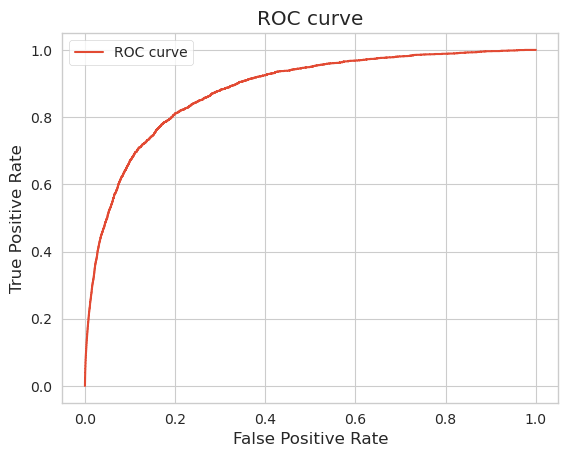

AUC: 0.8817400488419223
TPR:  50.42% 
FPR:  4.99% 
Threshold:  0.05
Predictive Equality:  33.51%
Precision: 0.125736568457539
Recall: 0.5041695621959694
F1 Score: 0.2012761825495908


In [ ]:
score_keras_model(best_model)

### **Observation**

In summary, hyperparameter tuning of the neural network resulted in:

- A slight decrease in AUC from 0.885 to 0.882
- A decrease in TPR from 51.88% to 50.42%
- A marginal decrease in FPR from 5.0% to 4.99%
- A significant decrease in predictive equality
- An increase in precision, recall and F1 score

## **Add Two more  ML Models**
   1. Decision Tree model

   2. Extra Trees model

   


### **Decision Tree Model without Hyperparamter tuning**

In [ ]:
# Create the classifier - default parameters here
clf_1 = DecisionTreeClassifier()

# Fit the classifier to the training data
clf_1.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf_1.predict(X_test)

# Calculate AUC score
auc_score = roc_auc_score(y_test, y_pred)

print(auc_score)

0.5505525466315231


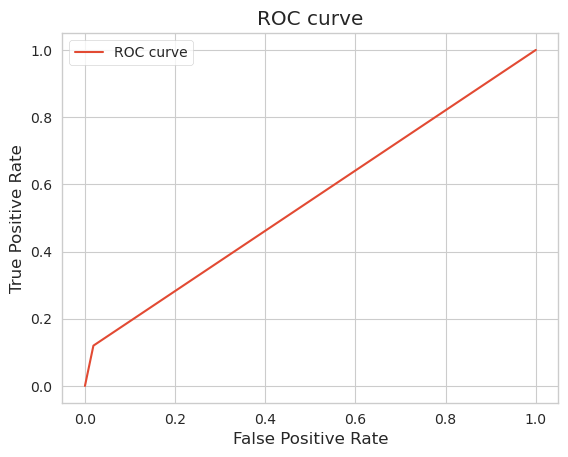

AUC: 0.5505525466315231
TPR:  11.99% 
FPR:  1.8800000000000001% 
Threshold:  1.0
Predictive Equality:  41.27%
Precision: 0.08335346702101958
Recall: 0.11987491313412092
F1 Score: 0.09833262077811031


In [ ]:
predictions_DT = clf_1.predict_proba(X_test)[:,1]
evaluate(predictions_DT,y_test)

### **Hyperparamter tuning for Decision Tree Model.**

In [ ]:
# Define the parameter distribution for Random Search
'''
param_dist = {
    'criterion': ['gini', 'entropy'],
    'max_depth': randint(1, 20),
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 11),
    'max_features': ['auto', 'sqrt', 'log2', None],
    'class_weight': ['balanced', None]
}
'''
param_dist = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(1, 21),
    'min_samples_split': range(2, 11),
    'min_samples_leaf': range(1, 11),
    'max_features': ['auto', 'sqrt', 'log2', None],
    'class_weight': ['balanced', None]
}

# Create a RandomizedSearchCV object with the parameter distribution and number of iterations
random_search = RandomizedSearchCV(DecisionTreeClassifier(), param_distributions=param_dist, n_iter=20, cv=5, n_jobs=-1,scoring='roc_auc')
# Fit the RandomizedSearchCV object to the data
random_search.fit(X_train, y_train)

/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/opt/conda/lib/python3.9

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'class_weight': ['balanced', None],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': range(1, 21),
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': range(1, 11),
                                        'min_samples_split': range(2, 11)},
                   scoring='roc_auc')

In [ ]:
# Get the best hyperparameters and their corresponding score
best_params = random_search.best_params_
best_score = random_search.best_score_

# Print the best hyperparameters and their corresponding score
print(f"Best hyperparameters: {best_params}")
print(f"Best score: {best_score}")

Best hyperparameters: {'min_samples_split': 8, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_depth': 7, 'criterion': 'entropy', 'class_weight': None}
Best score: 0.8116284786269332


In [ ]:
# Use the best hyperparameters to create and train a new decision tree model
best_model_DT = DecisionTreeClassifier(**best_params)
best_model_DT.fit(X_train, y_train)

# Use the trained model to make predictions on the test data
y_pred = best_model_DT.predict(X_test)

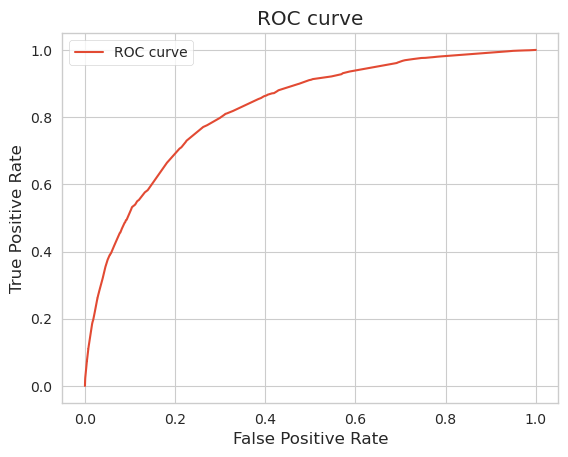

AUC: 0.8250682264132527
TPR:  35.44% 
FPR:  4.54% 
Threshold:  0.05
Predictive Equality:  65.68%
Precision: 0.10001961168856638
Recall: 0.35441278665740095
F1 Score: 0.1560110125420618


In [ ]:
predictions_DT = best_model_DT.predict_proba(X_test)[:,1]
evaluate(predictions_DT,y_test)

### **Observation**





hyperparameter tuning significantly improved the performance of the decision tree model:

- The AUC improved from 0.551 to 0.825
- The TPR increased from 11.99% to 35.44%
- The precision, recall and F1 score all more than doubled
- The predictive equality also improved from 41.27% to 65.68%

### **Extra Trees model without hyperparameter tuning**

In [ ]:
# Define Extra Trees classifier
et = ExtraTreesClassifier(n_estimators=100, random_state=42)

# Train the model
et.fit(X_train, y_train)

# Predict on test data
y_pred = et.predict(X_test)

# Calculate AUC score
auc_score = roc_auc_score(y_test, y_pred)

print(auc_score)

0.5015536913480689


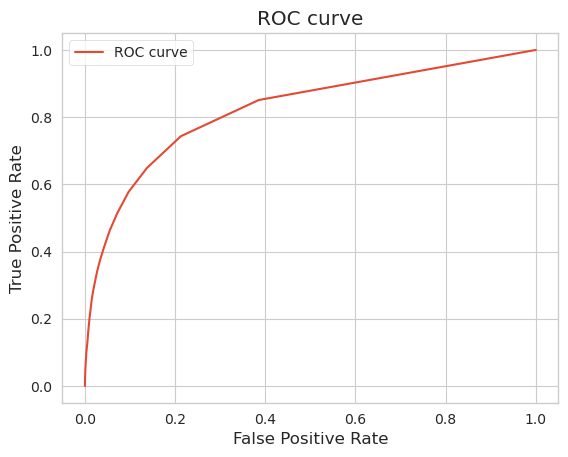

AUC: 0.822899469479062
TPR:  41.449999999999996% 
FPR:  4.2700000000000005% 
Threshold:  0.07
Predictive Equality:  35.699999999999996%
Precision: 0.12140022387300295
Recall: 0.41452397498262683
F1 Score: 0.1878000787091696


In [ ]:
predictions_et= et.predict_proba(X_test)[:,1]
evaluate(predictions_et,y_test)

### **Hyperparamter Tuning for Extra Trees model.**

In [ ]:
# Define the parameter space to search over
param_dist = {
    'n_estimators': range(10, 101),
    'max_features': ['auto', 'sqrt'],
    'max_depth': [10, 20, 30],
    'min_samples_split': range(2, 10),
    'min_samples_leaf': range(1, 10)
}

# Create an ExtraTrees regressor object
et = ExtraTreesClassifier()

# Create a randomized search object
random_search_ET = RandomizedSearchCV(et, param_distributions=param_dist, n_iter=10, cv=5, verbose=2, random_state=42, n_jobs=1,scoring='roc_auc')

# Fit the randomized search object to the data
random_search_ET.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=7, n_estimators=62; total time=  54.3s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=7, n_estimators=62; total time=  54.1s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=7, n_estimators=62; total time=  52.8s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=7, n_estimators=62; total time=  53.4s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=7, n_estimators=62; total time=  53.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=51; total time=  34.1s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=51; total time=  34.2s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=51; total 

RandomizedSearchCV(cv=5, estimator=ExtraTreesClassifier(), n_jobs=1,
                   param_distributions={'max_depth': [10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': range(1, 10),
                                        'min_samples_split': range(2, 10),
                                        'n_estimators': range(10, 101)},
                   random_state=42, scoring='roc_auc', verbose=2)

In [ ]:
# Get the best hyperparameters and their corresponding score
best_params = random_search.best_params_
best_score = random_search.best_score_

# Print the best hyperparameters and their corresponding score
print(f"Best hyperparameters: {best_params}")
print(f"Best score: {best_score}")

Best hyperparameters: {'min_samples_split': 8, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_depth': 7, 'criterion': 'entropy', 'class_weight': None}
Best score: 0.8116284786269332


In [ ]:
# Create an ExtraTrees regressor object with the best parameters found from the random search
et_best = ExtraTreesClassifier(**best_params)

# Fit the ExtraTrees model to the training data
et_best.fit(X_train, y_train)

ExtraTreesClassifier(criterion='entropy', max_depth=7, min_samples_leaf=3,
                     min_samples_split=8)

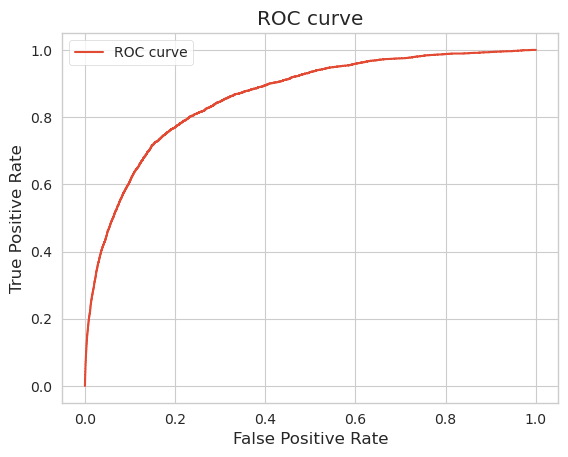

AUC: 0.8615517933484008
TPR:  45.83% 
FPR:  5.0% 
Threshold:  0.03
Predictive Equality:  38.05%
Precision: 0.11546879103562988
Recall: 0.45830437804030577
F1 Score: 0.18446262499125934


In [ ]:
predictions_ET = et_best.predict_proba(X_test)[:,1]
evaluate(predictions_ET,y_test)

### **Observation**


- The AUC improved from 0.823 to 0.862 after hyperparameter tuning
- The true positive rate increased from 41.45% to 45.83%
- The predictive equality also increased slightly
- The false positive rate increased from 4.27% to 5.0%
- The precision, recall and F1 score either decreased marginally or remained similar

### **Performance of Baseline Models vs After Hyperparameter Tuning**


- Hyperparameter tuning improved the performance of most models, especially RandomForestClassifier and Decision Tree
- Neural Network and LogisticRegression had the highest baseline AUCs around 0.88
- After tuning, the best performing models were Neural Network, LogisticRegression, and XGBClassifier with AUCs around 0.88
- Decision Tree and Extra Trees had lower baseline AUCs but also showed good improvement with hyperparameter tuning

# **2- Data Preprocessing**

In [ ]:
df = pd.read_csv('Fraud Detection/neurips-2022/Base.csv')

## **Dealing with missing values**

In the datasheet we have
- prev_address_months_count - Number of months at applicant's previous address, ranging from -1 to 380 (-1 is missing data)
- bank_months_count - Age of applicant's previous bank account in months, ranging from -1 to 32 (-1 is missing)
- device_distinct_emails (numeric): Number of distinct emails in banking website from the used device in last 8 weeks. Ranges between [−1, 2] emails (-1 is a missing value).

- session_length_in_minutes (numeric): Length of user session in banking website in minutes. Ranges between [−1, 107] minutes (-1 is a missing value).
- current_address_months_count (numeric): Months in currently registered address of the applicant. Ranges between [−1, 429] months (-1 is a missing value).

- Intended_balcon_amount (numeric): Initial transferred amount for application. Ranges between [−16, 114] (negatives are missing values).

### **Function for Replace Negatives values**

In [ ]:
def replace_negatives(df):

    # Replace -1 with NaN for specific columns
    cols = ['prev_address_months_count',
                'current_address_months_count',
                  'bank_months_count',
                    'session_length_in_minutes',
                      'device_distinct_emails_8w']

    for col in cols:
        df[col] = df[col].replace(-1, np.nan)

    # Replace all negative values in specific column
    df['intended_balcon_amount'] = df['intended_balcon_amount'].replace(
        [x for x in df['intended_balcon_amount'] if x < 0], np.nan)

replace_negatives(df)

**Missing Values of Features by Fraud Status**

In [ ]:
# Initialize an empty DataFrame to hold the percentage of missing values for each feature
missing_vals = pd.DataFrame()

# List of features to check for missing values
missing_features = ['prev_address_months_count',
'current_address_months_count',
'bank_months_count',
'session_length_in_minutes',
'device_distinct_emails_8w']

# calculate the percentage of missing values, and add to the missing_vals DataFrame
for feature in missing_features:
    missing_vals_col = df.groupby('fraud_bool')[feature].apply(lambda x: round(x.isna().sum()/len(x) * 100, 2))
    missing_vals[feature] = missing_vals_col

print(missing_vals)

            prev_address_months_count  current_address_months_count   
fraud_bool                                                            
0                               71.06                          0.43  \
1                               91.89                          0.13   

            bank_months_count  session_length_in_minutes   
fraud_bool                                                 
0                       25.23                       0.20  \
1                       37.54                       0.16   

            device_distinct_emails_8w  
fraud_bool                             
0                                0.04  
1                                0.04  


In [ ]:
# Reshape the missing_vals DataFrame from wide to long format
missing_vals = pd.DataFrame(missing_vals.T.stack())

# Reset the index and rename the columns
missing_vals.reset_index(inplace=True)
missing_vals.rename(columns={'level_0': 'feature', 0: 'missing_vals'}, inplace=True)

print(missing_vals)

                        feature  fraud_bool  missing_vals
0     prev_address_months_count           0         71.06
1     prev_address_months_count           1         91.89
2  current_address_months_count           0          0.43
3  current_address_months_count           1          0.13
4             bank_months_count           0         25.23
5             bank_months_count           1         37.54
6     session_length_in_minutes           0          0.20
7     session_length_in_minutes           1          0.16
8     device_distinct_emails_8w           0          0.04
9     device_distinct_emails_8w           1          0.04


<Figure size 800x600 with 0 Axes>

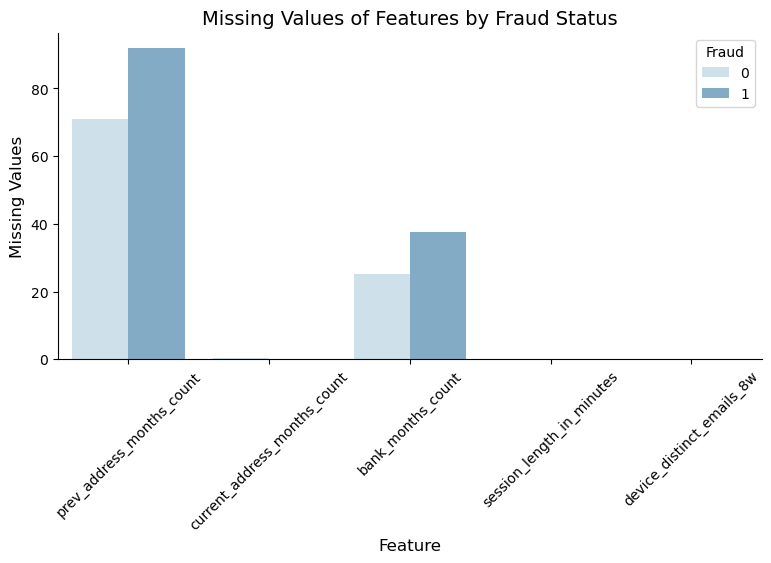

In [ ]:
# Set up plot
plt.figure(figsize=(8, 6))

# Create bar plot
sns.catplot(data=missing_vals, kind="bar", x="feature", y="missing_vals", hue="fraud_bool", palette=my_palette, alpha=.6, height=4, aspect=2, legend=False)

# Customize labels and legend
plt.xlabel("Feature", fontsize=12)
plt.ylabel("Missing Values", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.title("Missing Values of Features by Fraud Status", fontsize=14)
plt.legend(title="Fraud", fontsize=10)

# Display plot
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


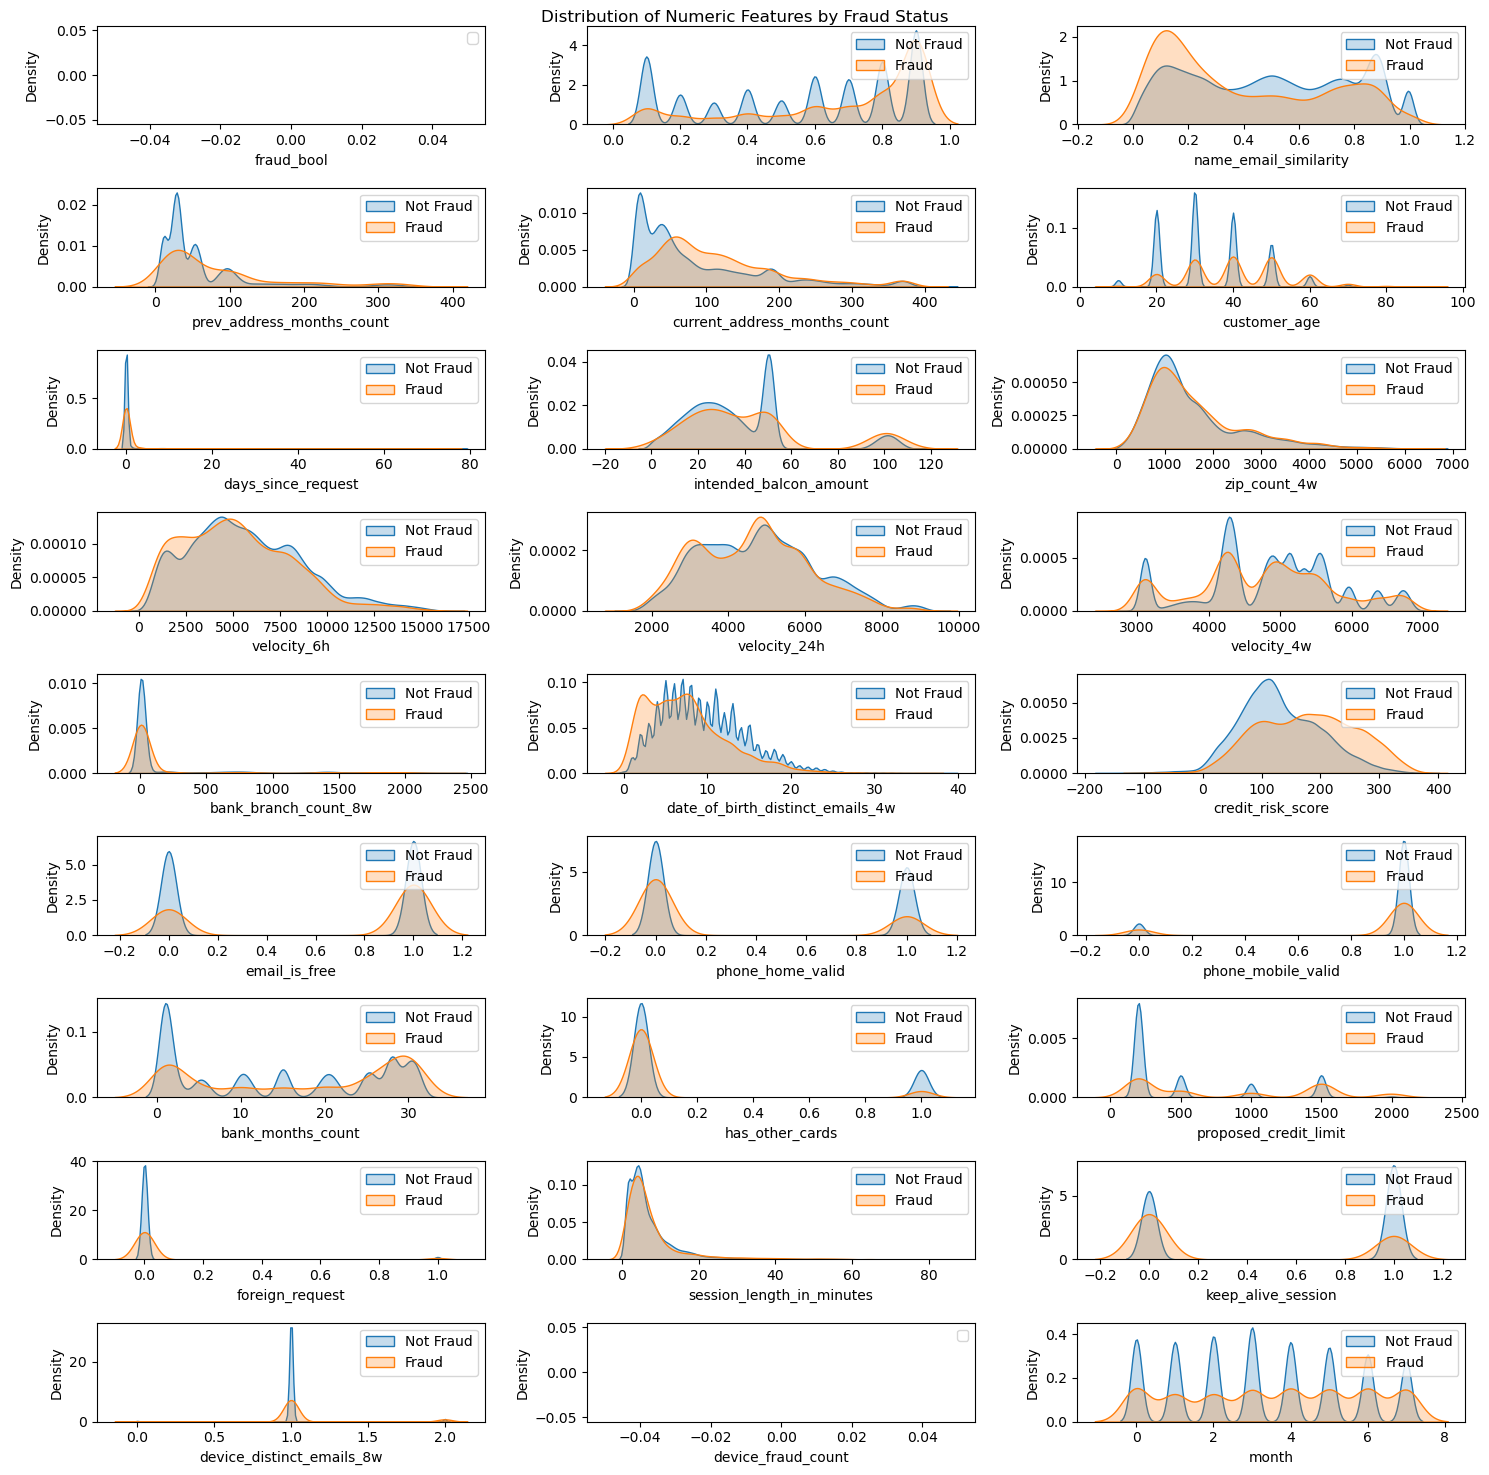

In [ ]:
# Create a grid of subplots
fig, axes = plt.subplots(nrows=9, ncols=3, figsize=(15, 15))

# Add a title to the figure
fig.suptitle('Distribution of Numeric Features by Fraud Status')

# Loop through the numeric features and plot a kernel density plot for each feature
for i, feature in enumerate(numerical_features):
    ax = axes[i // 3][i % 3]
    sns.kdeplot(data=df[df['fraud_bool'] == 0][feature], fill=True, ax=ax, label='Not Fraud',warn_singular=False)
    sns.kdeplot(data=df[df['fraud_bool'] == 1][feature], fill=True, ax=ax, label='Fraud',warn_singular=False)
    ax.set_xlabel(feature)
    ax.legend()

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

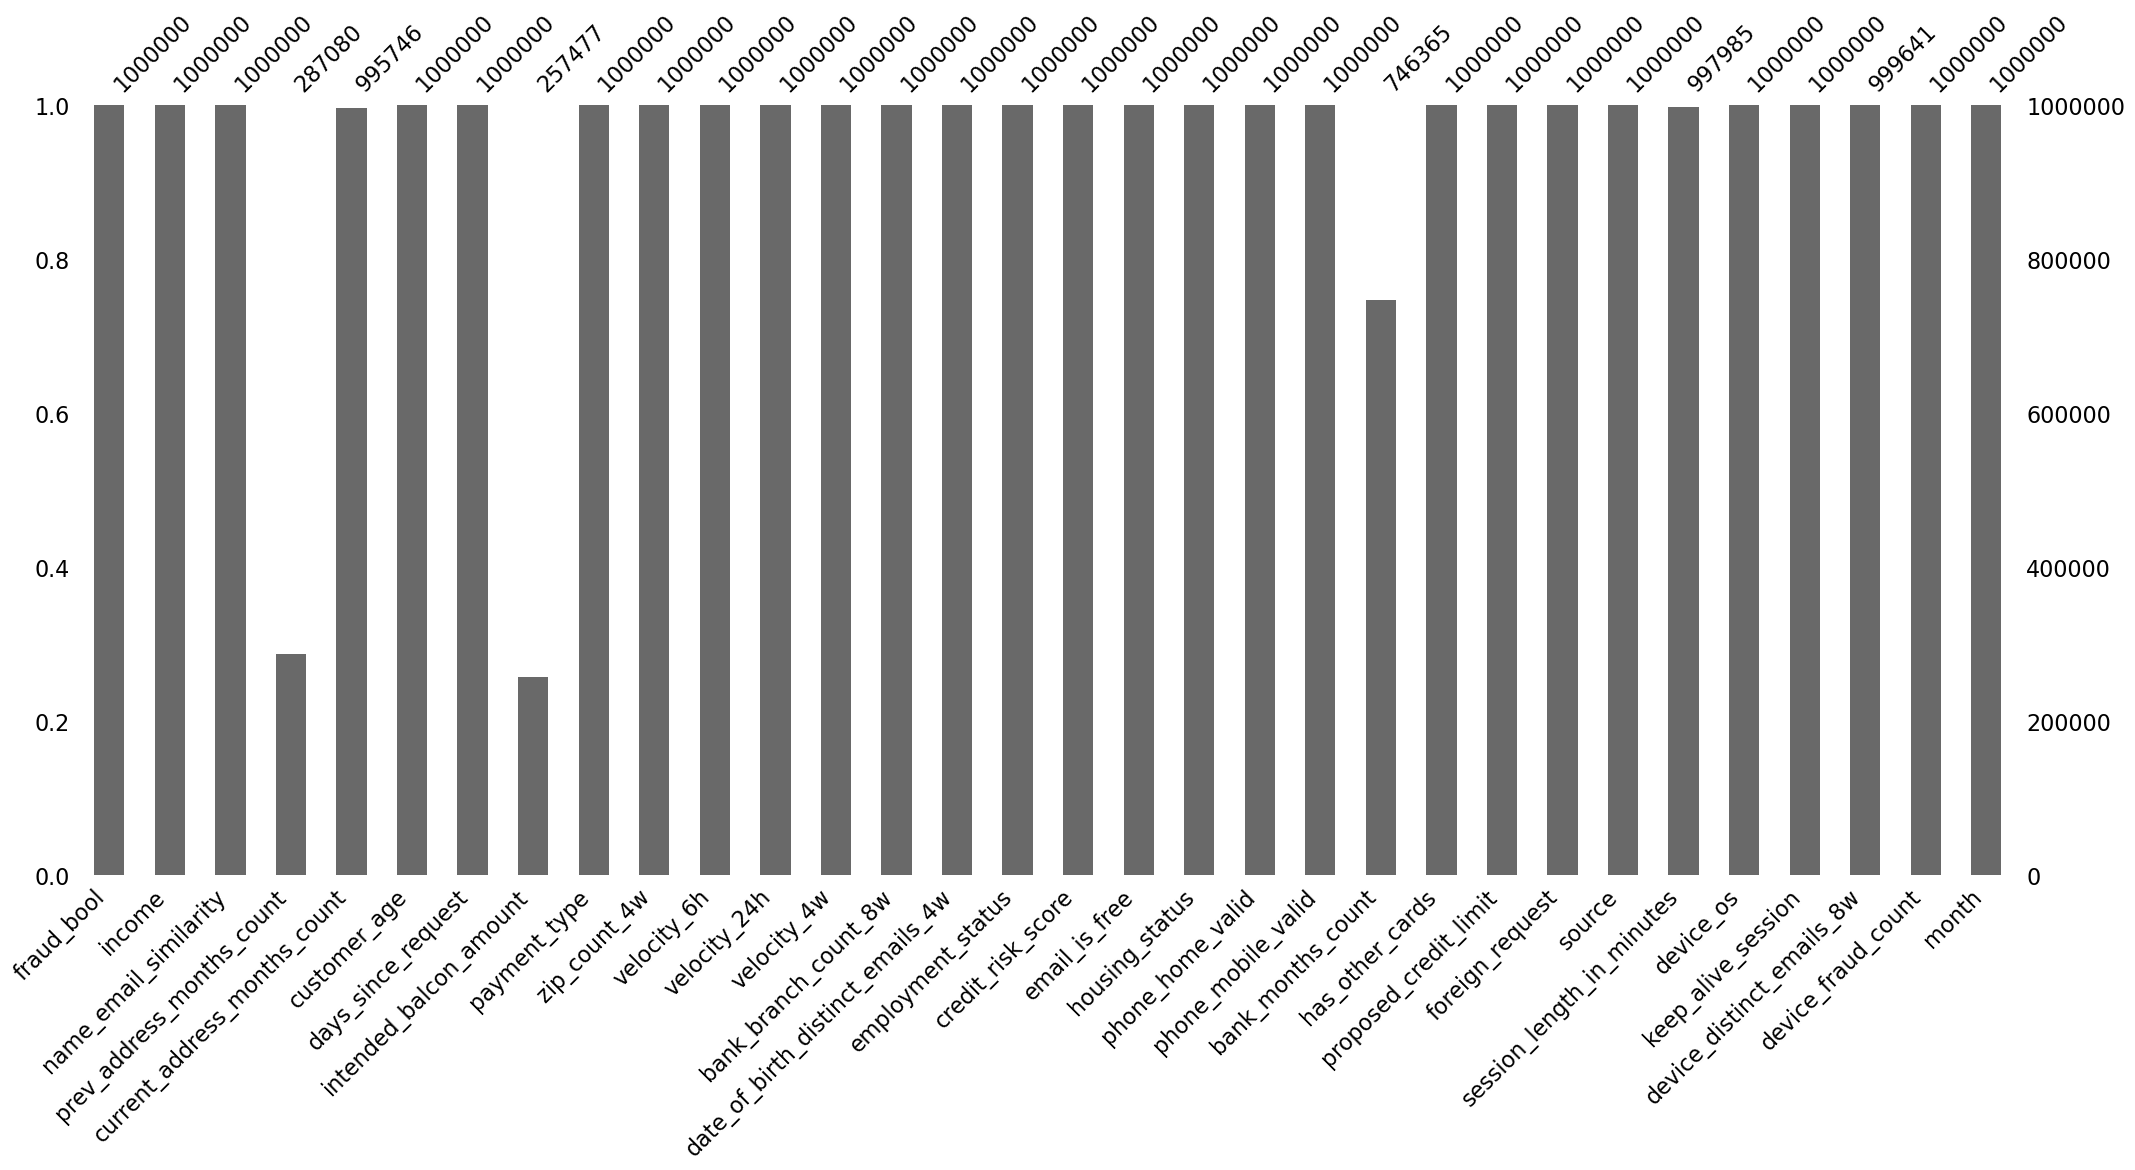

In [ ]:
# Bar plot of missing data percentage by column
msno.bar(df)
plt.show()

Pattern of missing values is a general and completely at random

In [ ]:
df.isnull().values.any()

True

In [ ]:
df.isnull().values.sum()

1715706

### **Function for Impute Missing values**

In [ ]:
def impute_missing(df):

        # Get all columns with missing values
        cols_missing = df.columns[df.isna().any()]

        for col in cols_missing:
            # Impute median for all columns with missing
            df[col].fillna(df[col].median(), inplace=True)

impute_missing(df)

In [ ]:
df.isnull().values.sum()

0

## **Logarithmic Scaling**

<Axes: >

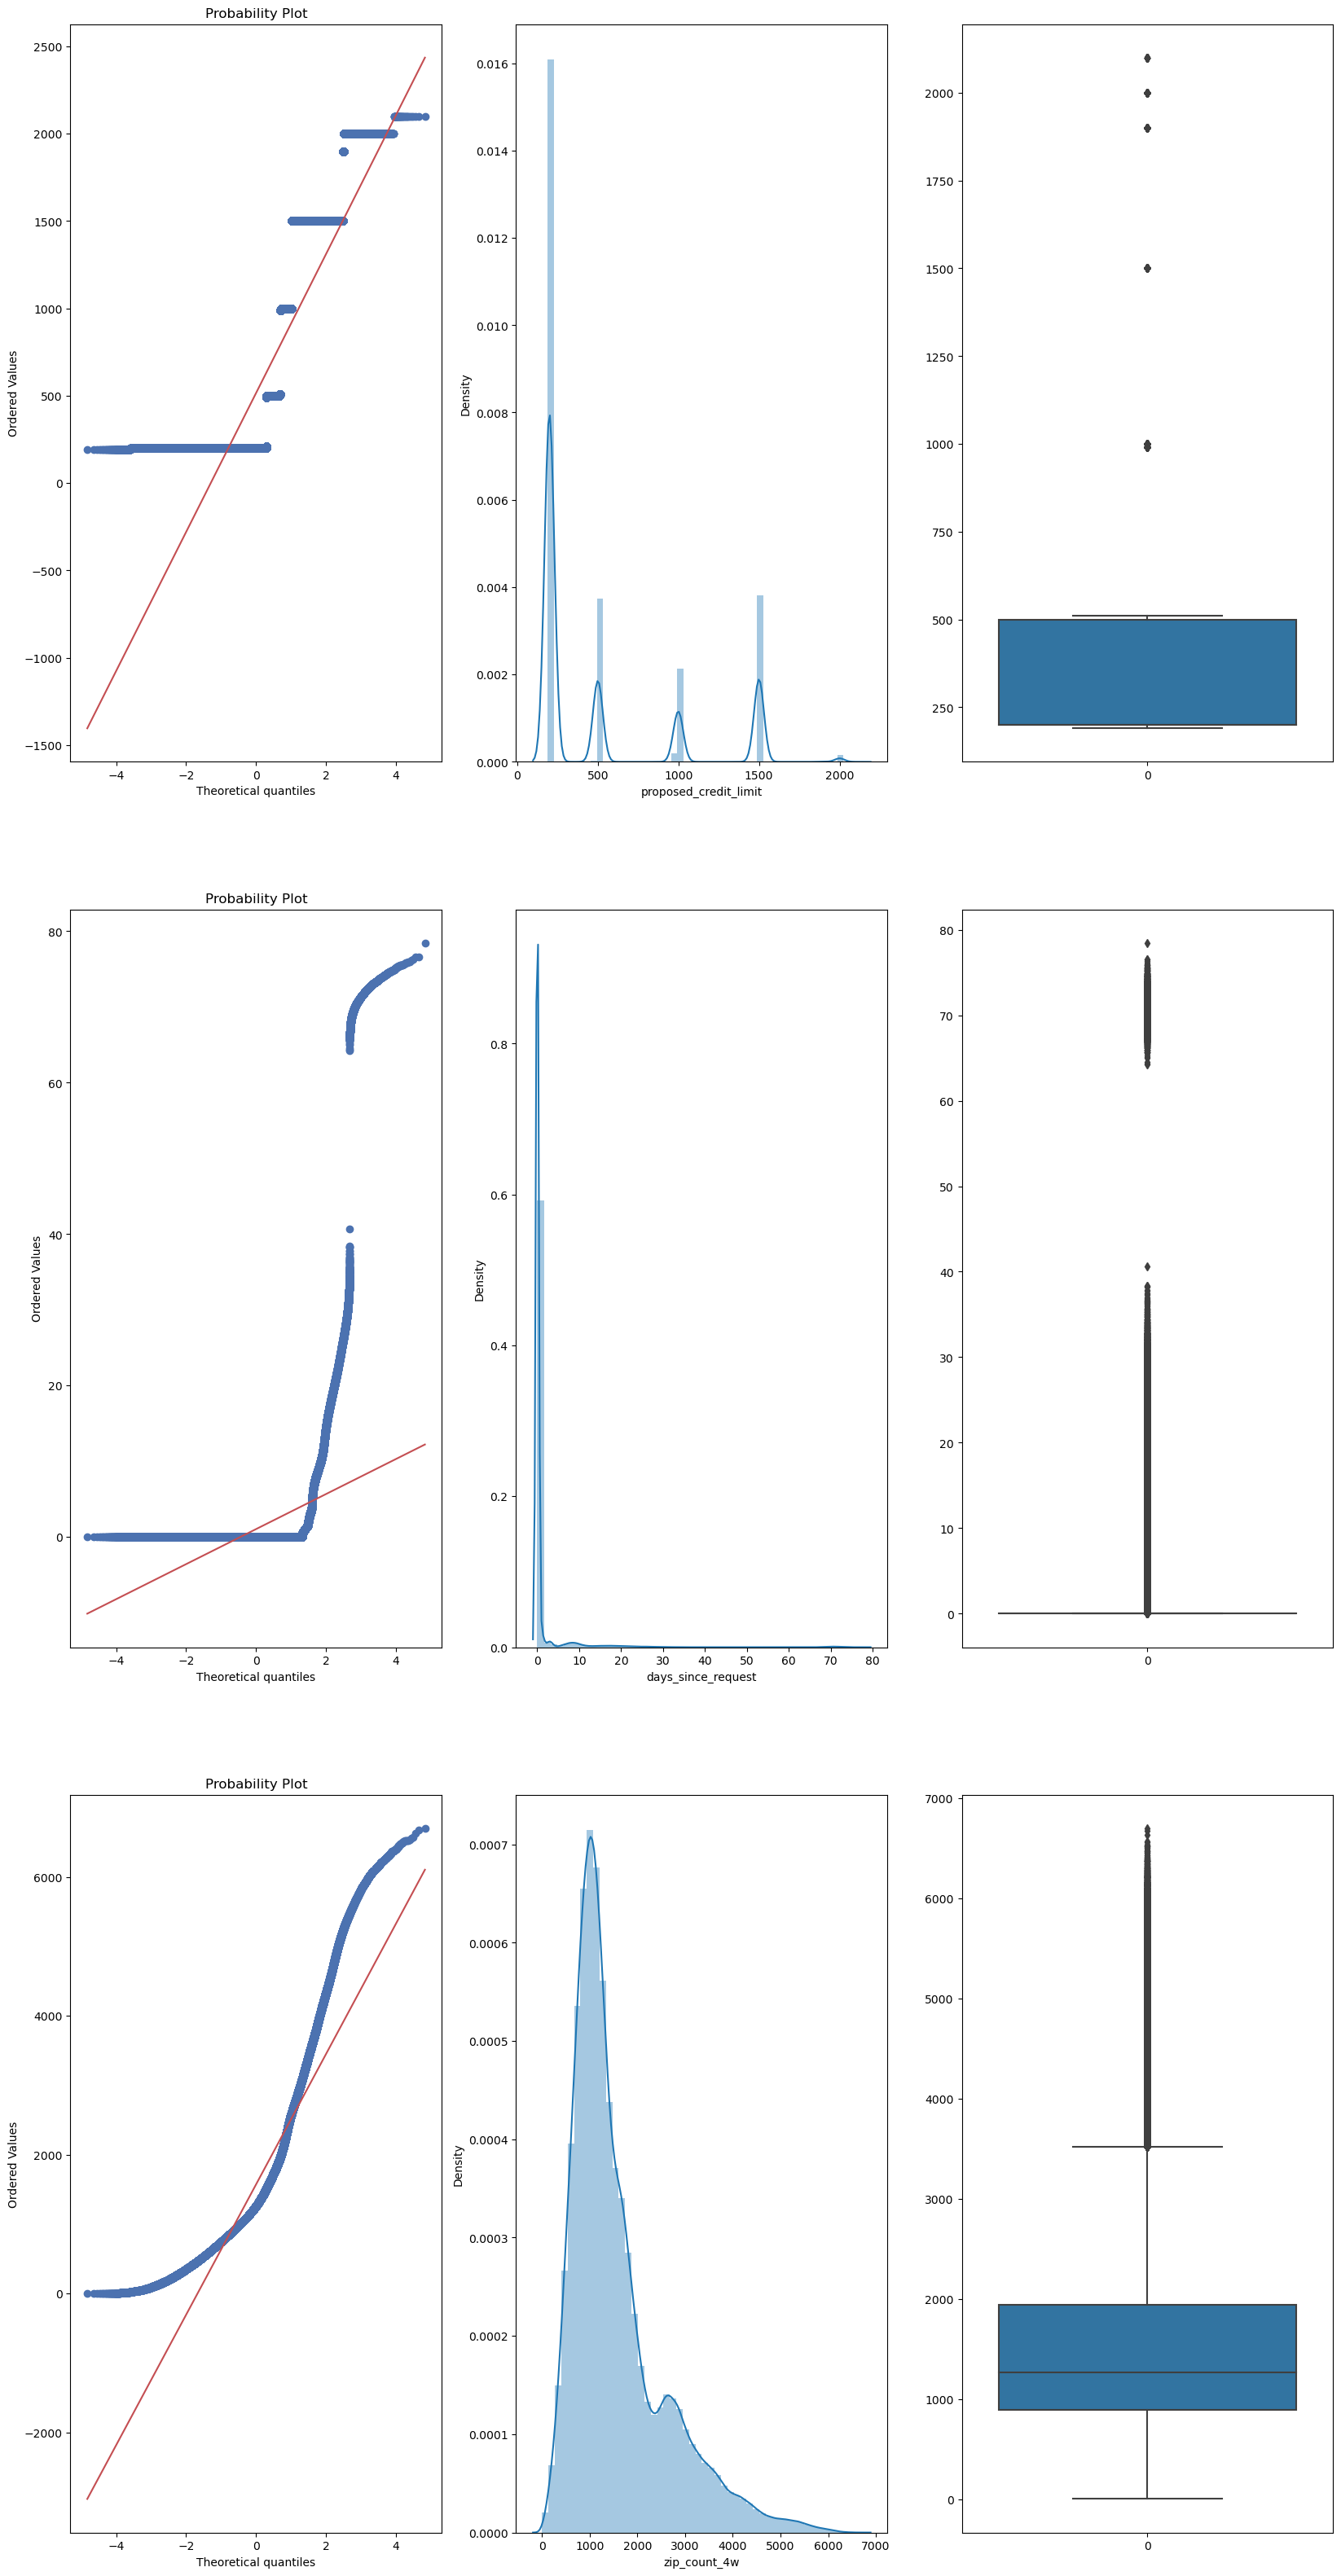

In [ ]:
#Before transform
fig = plt.figure(figsize=(20,40))
plt.subplot(3,3,1)
stats.probplot(df_dumm['proposed_credit_limit'], plot=plt) #QQ plot
plt.subplot(3,3,2)
sns.distplot(df_dumm['proposed_credit_limit']) #Histogram
plt.subplot(3,3,3)
sns.boxplot(df['proposed_credit_limit']) #Boxplot

plt.subplot(3,3,4)
stats.probplot(df_dumm['days_since_request'], plot=plt)
plt.subplot(3,3,5)
sns.distplot(df_dumm['days_since_request'])
plt.subplot(3,3,6)
sns.boxplot(df_dumm['days_since_request'])

plt.subplot(3,3,7)
stats.probplot(df_dumm['zip_count_4w'], plot=plt)
plt.subplot(3,3,8)
sns.distplot(df_dumm['zip_count_4w'])
plt.subplot(3,3,9)
sns.boxplot(df_dumm['zip_count_4w'])

In [ ]:
# Take log of columns
df_dumm['proposed_credit_limit'] = np.log(df_dumm['proposed_credit_limit'])
df_dumm['days_since_request'] = np.log(df_dumm['days_since_request'])
df_dumm['zip_count_4w'] = np.log(df_dumm['zip_count_4w'])

<Axes: >

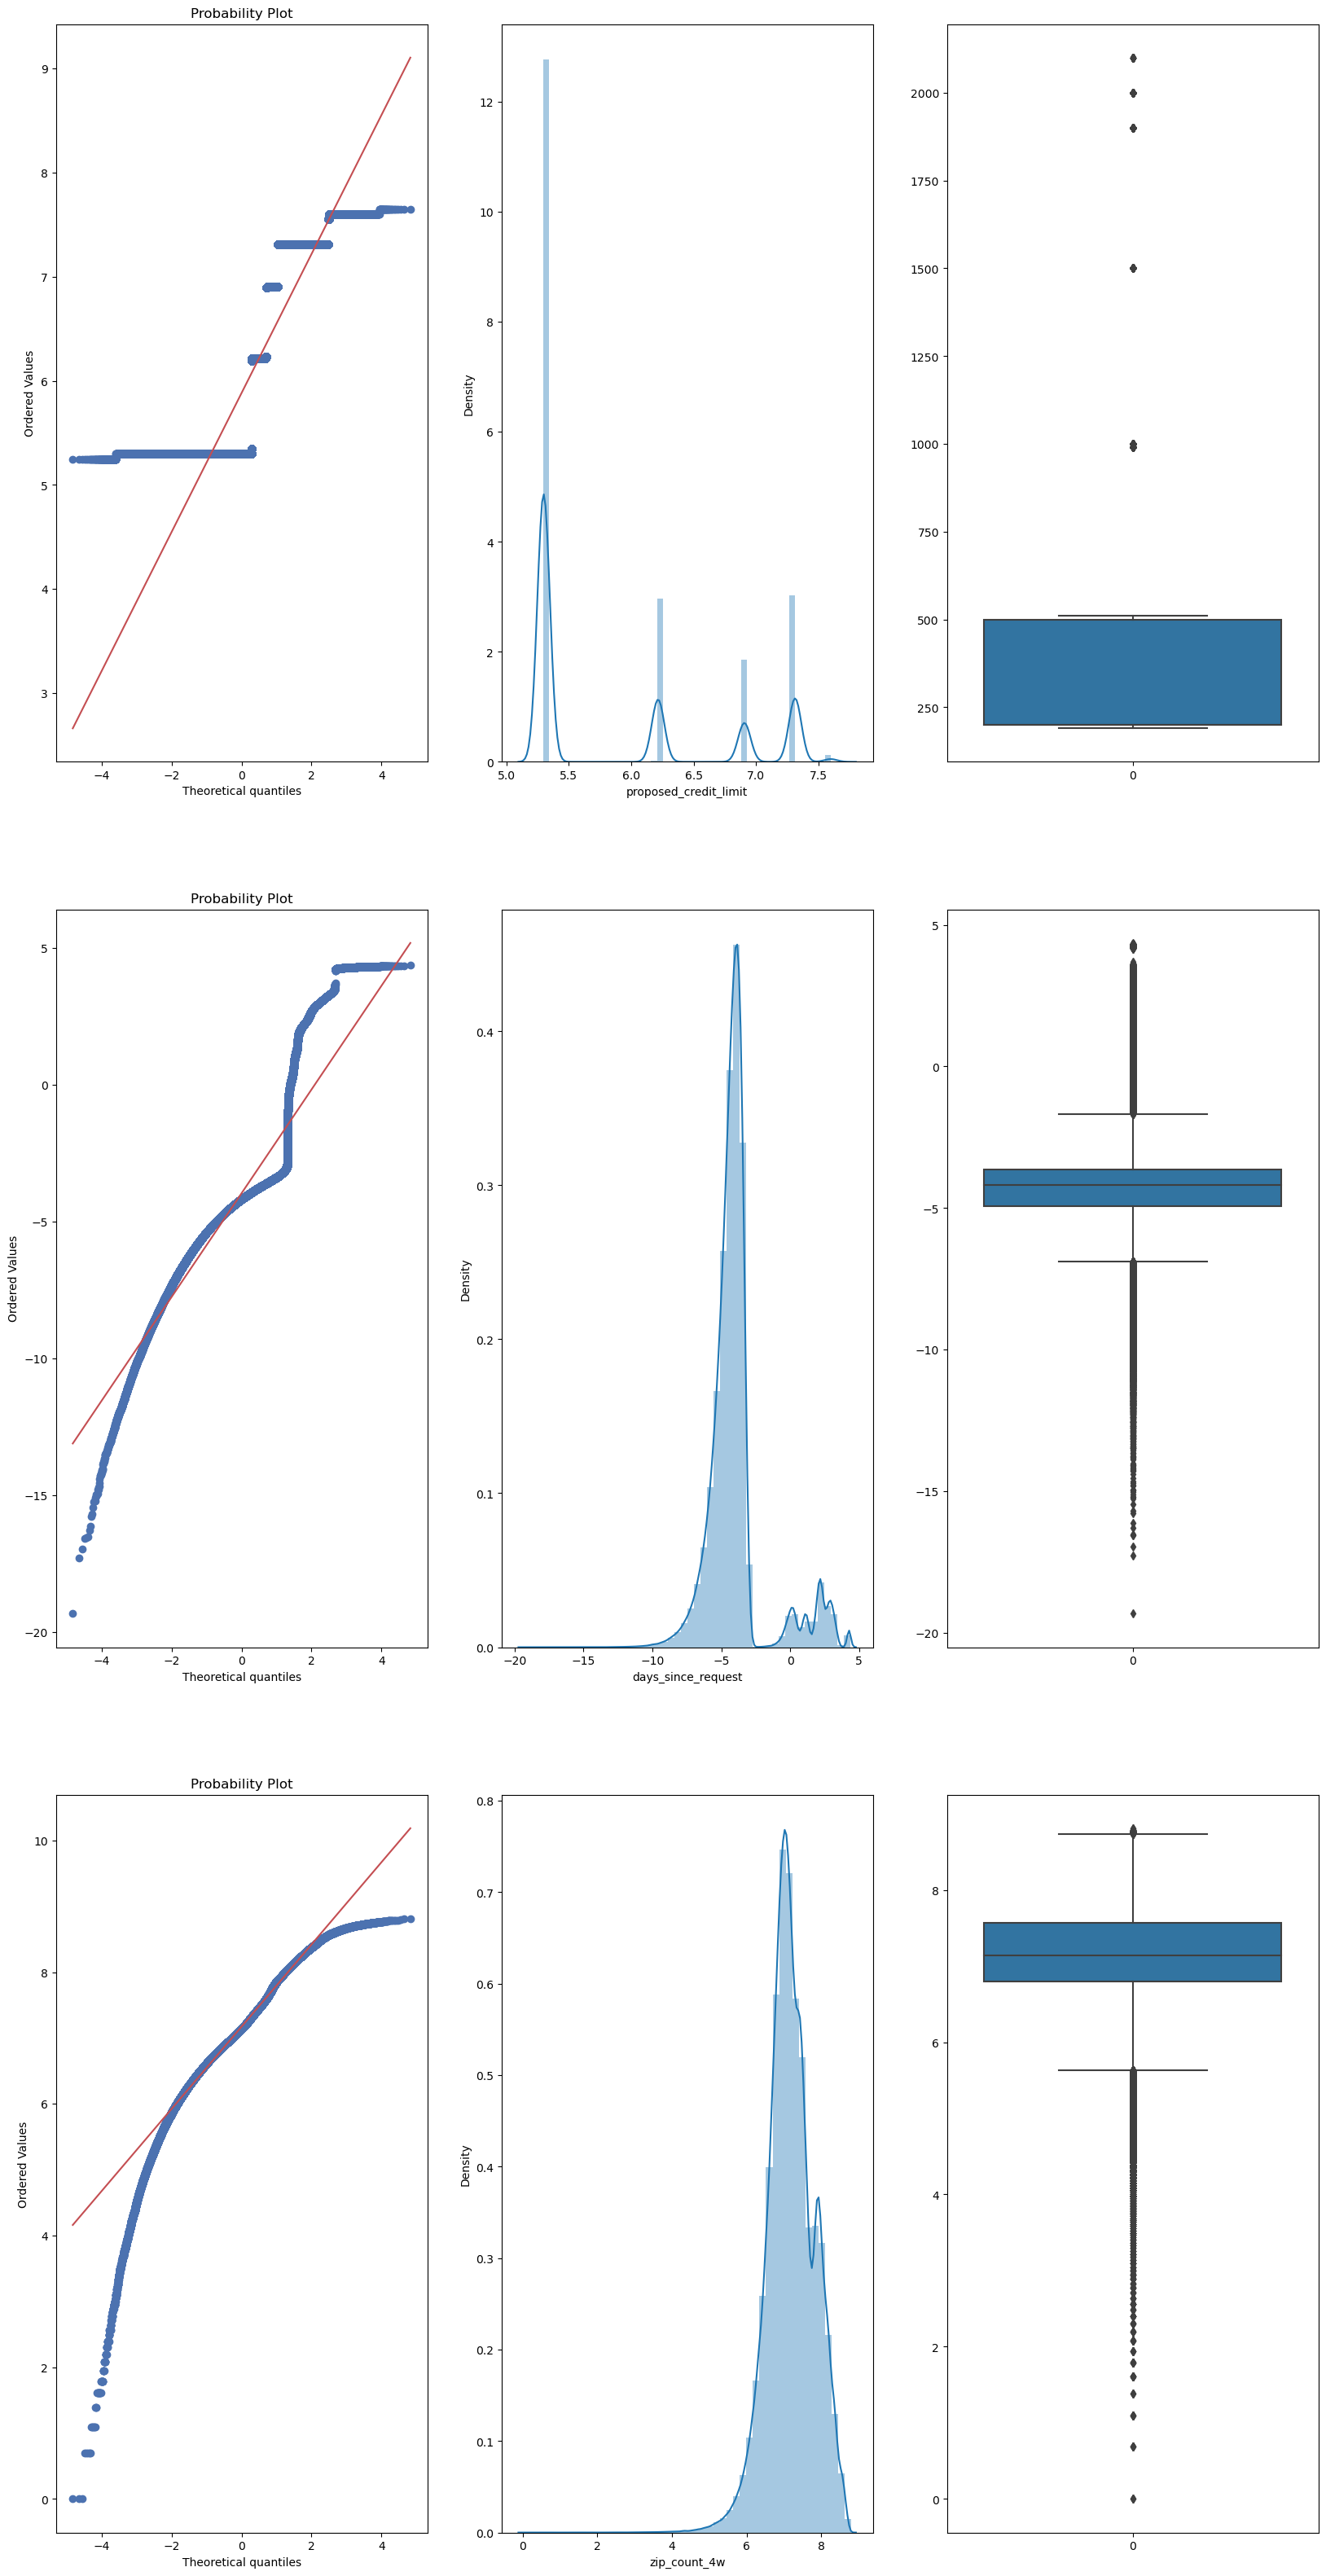

In [ ]:
# After transform
fig = plt.figure(figsize=(20,40))
plt.subplot(3,3,1)
stats.probplot(df_dumm['proposed_credit_limit'], plot=plt) #QQ plot
plt.subplot(3,3,2)
sns.distplot(df_dumm['proposed_credit_limit']) #Histogram
plt.subplot(3,3,3)
sns.boxplot(df['proposed_credit_limit']) #Boxplot

plt.subplot(3,3,4)
stats.probplot(df_dumm['days_since_request'], plot=plt)
plt.subplot(3,3,5)
sns.distplot(df_dumm['days_since_request'])
plt.subplot(3,3,6)
sns.boxplot(df_dumm['days_since_request'])

plt.subplot(3,3,7)
stats.probplot(df_dumm['zip_count_4w'], plot=plt)
plt.subplot(3,3,8)
sns.distplot(df_dumm['zip_count_4w'])
plt.subplot(3,3,9)
sns.boxplot(df_dumm['zip_count_4w'])

### **Function for preprocess data (Scaling & Encoding categorical data)**

In [ ]:
def preprocess(df, target_col='fraud_bool'):

    # Take log of skewed columns
    df['proposed_credit_limit'] = np.log(df['proposed_credit_limit'])
    df['days_since_request'] = np.log(df['days_since_request'])
    df['zip_count_4w'] = np.log(df['zip_count_4w'])

    # One hot encode categorical columns
    df = pd.get_dummies(df, drop_first=True)

    # Only drop target column if it exists
    if target_col in df.columns:

        X = df.drop(target_col, axis=1)
        y = df[target_col]

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


        return X_train, y_train, X_test, y_test

X_train, y_train, X_test, y_test = preprocess(df)

# **3-  Handling Imbalance**

Sampling before splitting to ensures that the sampled data has the same distribution as the original population. Each split (training, validation, test) will then contain a representative sample.

## **OverSampling**

### **Random oversampling:**
It involves randomly duplicating samples from the minority class to increase their numbers and make the class distributions more even.

In [ ]:
# Check class distribution in training set
print(y_train.value_counts()/len(y_train))

fraud_bool
0    0.988994
1    0.011006
Name: count, dtype: float64


In [ ]:
log_reg = LogisticRegression()

In [ ]:
#Instantiate oversampler and logistic regression model
randomover = RandomOverSampler(random_state=42)

#Fit oversampler on training data
X_train_random, y_train_random = randomover.fit_resample(X_train, y_train)

#Check the new class distribution
print(y_train_random.value_counts()/len(y_train_random))

#Fit model using oversampled training data
log_reg.fit(X_train_random, y_train_random)

#Make predictions on test set
y_pred = log_reg.predict(X_test)
y_pred_proba = log_reg.predict_proba(X_test)[:,1]

fraud_bool
0    0.5
1    0.5
Name: count, dtype: float64


In [ ]:
roc_auc_score_random = roc_auc_score(y_test, y_pred_proba)
print("AUC: ", roc_auc_score_random)

accuracy_random = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy_random)

precision_random = precision_score(y_test, y_pred)
print("Precision: ", precision_random)

recall_random = recall_score(y_test, y_pred)
print("Recall: ", recall_random)

f1_random = f1_score(y_test, y_pred)
print("F1 Score: ", f1_random)

AUC:  0.714481494967773
Accuracy:  0.643816
Precision:  0.020986090743456427
Recall:  0.6717638691322901
F1 Score:  0.04070068085839869


### **SMOTE**

**SMOTE (Synthetic Minority Oversampling Technique):**
- Generates synthetic samples of the minority class rather than duplicating real samples.

- Works by selecting a sample from the minority class, then finding its k-nearest neighbors.

A synthetic sample is then generated along the line segment between the selected sample and one of its neighbors.

This helps avoid simple duplication and leads to more generalizable synthetic samples.

In [ ]:
# Instantiate SMOTE sampler
smote = SMOTE(random_state=42)

# Fit and oversample only the training set
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check the new class distribution
print(y_train_smote.value_counts()/len(y_train_smote))

# Train a model using the oversampled training data
log_reg.fit(X_train_smote, y_train_smote)

#Make predictions on test set
y_pred = log_reg.predict(X_test)
y_pred_proba = log_reg.predict_proba(X_test)[:,1]

fraud_bool
0    0.5
1    0.5
Name: count, dtype: float64


In [ ]:
roc_auc_score_smote = roc_auc_score(y_test, y_pred_proba)
print("AUC: ", roc_auc_score_smote)

accuracy_smote = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy_smote)

precision_smote = precision_score(y_test, y_pred)
print("Precision: ", precision_smote)

recall_smote = recall_score(y_test, y_pred)
print("Recall: ", recall_smote)

f1_smote = f1_score(y_test, y_pred)
print("F1 Score:", f1_smote)

AUC:  0.7168371665258969
Accuracy:  0.64824
Precision:  0.021107110711071107
Recall:  0.6671408250355618
F1 Score: 0.04091960040134363


### **ADASYN (Adaptive Synthetic Sampling):**
- Generates synthetic samples for minority class samples that are harder to learn.

Assigns higher weights to minority class samples that are harder to learn based on their distance to nearby majority class samples.

Generates more synthetic samples for those minority class samples that are harder to learn.

This focuses the oversampling where it is needed most.

In [ ]:
# Instantiate ADASYN sampler
ada = ADASYN(random_state=42)

# Fit and oversample only the training set
X_train_ada, y_train_ada = ada.fit_resample(X_train, y_train)

# Check the new class distribution
print(y_train_ada.value_counts()/len(y_train_ada))

# Train a model using the oversampled training data
log_reg.fit(X_train_ada, y_train_ada)

#Make predictions on test set
y_pred = log_reg.predict(X_test)
y_pred_proba = log_reg.predict_proba(X_test)[:,1]

fraud_bool
0    0.500099
1    0.499901
Name: count, dtype: float64


In [ ]:
roc_auc_score_ADASYN = roc_auc_score(y_test, y_pred_proba)
print("AUC: ", roc_auc_score_ADASYN)

accuracy_ADASYN = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_ADASYN}")

precision_ADASYN = precision_score(y_test, y_pred)
print(f"Precision: {precision_ADASYN}")

recall_ADASYN = recall_score(y_test, y_pred)
print(f"Recall: {recall_ADASYN}")

f1_ADASYN = f1_score(y_test, y_pred)
print(f"F1 Score: {f1_ADASYN}")

AUC:  0.7167861675695794
Accuracy: 0.681456
Precision: 0.022381378692927483
Recall: 0.6401137980085349
F1 Score: 0.04325051660339276


### **SMOTE-ENN (SMOTE with edited nearest neighbor):**
- Applies SMOTE oversampling
- Then removes borderline and noisy samples using edited nearest neighbor cleaning.

This helps avoid overgeneralization due to synthetic samples.

In [ ]:
# Instantiate samplers
enn = SMOTEENN(random_state=42)

# Apply ENN cleaning
X_train_enn, y_train_enn = enn.fit_resample(X_train, y_train)

# Check the new class distribution
print(y_train_enn.value_counts()/len(y_train_enn))

# Train a model using the oversampled training data
log_reg.fit(X_train_enn, y_train_enn)

#Make predictions on test set
y_pred = log_reg.predict(X_test)
y_pred_proba = log_reg.predict_proba(X_test)[:,1]

fraud_bool
1    0.533094
0    0.466906
Name: count, dtype: float64


In [ ]:
roc_auc_score_SMOTEENN = roc_auc_score(y_test, y_pred_proba)
print("AUC: ", roc_auc_score_SMOTEENN)

accuracy_SMOTEENN = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_SMOTEENN}")

precision_SMOTEENN = precision_score(y_test, y_pred)
print(f"Precision: {precision_SMOTEENN}")

recall_SMOTEENN = recall_score(y_test, y_pred)
print(f"Recall: {recall_SMOTEENN}")

f1_SMOTEENN = f1_score(y_test, y_pred)
print(f"F1 Score: {f1_SMOTEENN}")

AUC:  0.7175039682767126
Accuracy: 0.593756
Precision: 0.019511672943489135
Recall: 0.7130156472261735
F1 Score: 0.03798391603754819


In [ ]:
techniques = ["Random", "SMOTE", "ADASYN", "SMOTEENN"]

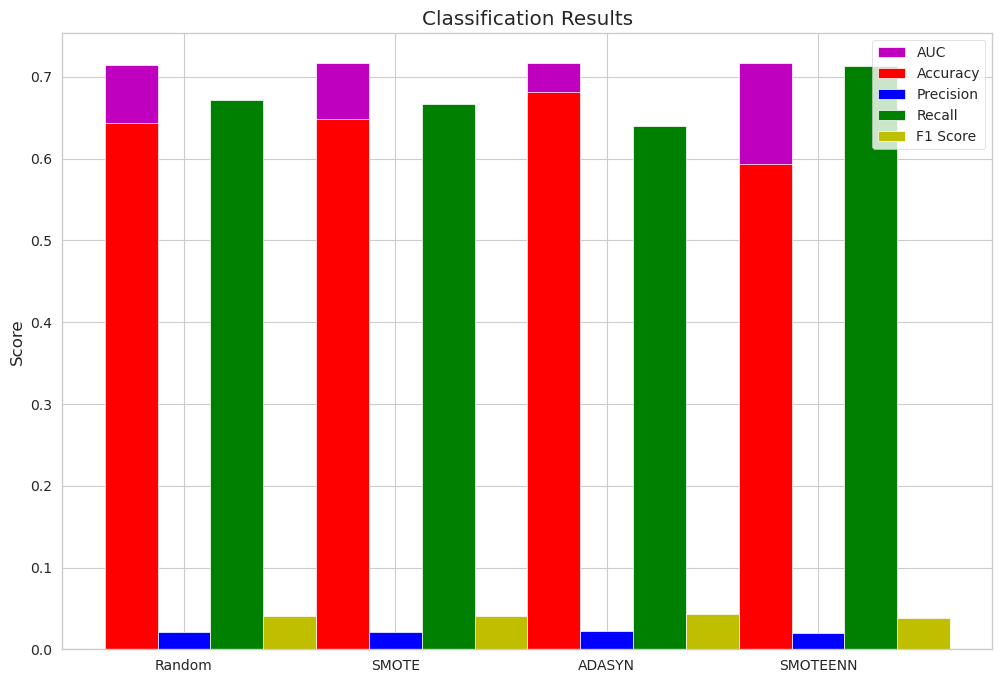

In [ ]:
plt.figure(figsize=(12,8))

x = np.arange(len(techniques))
width = 0.25

plt.bar(x - width, [roc_auc_score_random, roc_auc_score_smote, roc_auc_score_ADASYN, roc_auc_score_SMOTEENN], width, label='AUC', color='m')
plt.bar(x - width, [accuracy_random, accuracy_smote,accuracy_ADASYN, accuracy_SMOTEENN], width, label='Accuracy', color='r')
plt.bar(x, [precision_random, precision_smote,precision_ADASYN, precision_SMOTEENN], width, label='Precision', color='b')
plt.bar(x + width,[recall_random, recall_smote,recall_ADASYN, recall_SMOTEENN], width, label='Recall', color='g')
plt.bar(x + (width * 2),[f1_random, f1_smote,f1_ADASYN, f1_SMOTEENN], width, label='F1 Score', color='y')

plt.xticks(x, techniques)
plt.ylabel("Score")
plt.title("Classification Results")
plt.legend()

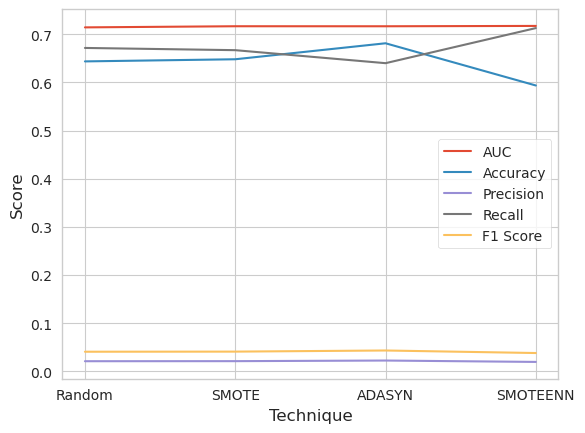

In [ ]:
plt.plot(techniques, [roc_auc_score_random, roc_auc_score_smote, roc_auc_score_ADASYN, roc_auc_score_SMOTEENN], label='AUC')
plt.plot(techniques, [accuracy_random, accuracy_smote,accuracy_ADASYN, accuracy_SMOTEENN], label='Accuracy')
plt.plot(techniques,[precision_random, precision_smote,precision_ADASYN, precision_SMOTEENN], label='Precision')
plt.plot(techniques, [recall_random, recall_smote,recall_ADASYN, recall_SMOTEENN], label='Recall')
plt.plot(techniques, [f1_random, f1_smote,f1_ADASYN, f1_SMOTEENN], label='F1 Score')

plt.xlabel("Technique")
plt.ylabel("Score")
plt.legend()

**Based on the metrics, it seems SMOTE-ENN had the best Recall performance:**

- SMOTE-ENN was most effective at addressing the class imbalance by upsampling the minority class to achieve the highest recall, this came at the expense of accuracy, precision and F1 score. ADASYN and SMOTE provided a better balance between the different evaluation metrics.

- SMOTE-ENN achieved the highest recall of 71.3% but at the cost of lower accuracy (59.4%), precision (1.95%) and F1 score (3.8%) compared to the other methods.

- ADASYN had the highest accuracy of 68.1% and a relatively high precision of 2.2% and recall of 64%, though the AUC was similar to the other methods at around 0.717.

- Random oversampling and SMOTE had similar results in terms of AUC (around 0.714 - 0.716), accuracy (64.4% - 64.8%), precision (2.1%) and F1 score (4.1%). Their recall values were also close at 67.2% and 66.7% respectively.

**In summary:**

- SMOTE-ENN achieved the highest recall but at the cost of lower accuracy, precision and F1 score.

- ADASYN had the highest accuracy and a relatively high precision and recall.

- Random oversampling and SMOTE had similar results, though with slightly lower recall than ADASYN.

- The AUC scores were all similar, indicating that the different methods did not significantly alter the separability of the classes.

## **underSampling**

### **Random undersampling**

Randomly remove majority class examples to match the size of the minority class. This is the simplest undersampling technique.

In [ ]:
rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

# Train a model
log_reg.fit(X_resampled, y_resampled)

#Make predictions on test set
y_pred = log_reg.predict(X_test)
y_pred_proba = log_reg.predict_proba(X_test)[:,1]

In [ ]:
roc_auc_score_rus = roc_auc_score(y_test, y_pred_proba)
print("AUC: ", roc_auc_score_rus)

accuracy_rus = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_rus}")

precision_rus = precision_score(y_test, y_pred)
print(f"Precision: {precision_rus}")

recall_rus = recall_score(y_test, y_pred)
print(f"Recall: {recall_rus}")

f1_rus = f1_score(y_test, y_pred)
print(f"F1 Score: {f1_rus}")

AUC:  0.7134566800992503
Accuracy: 0.6465
Precision: 0.02107987131067282
Recall: 0.6776079136690647
F1 Score: 0.040887755378896815


### **Tomek links undersampling**
Identify Tomek links, which are data points from different classes that are each other's nearest neighbors. Remove data points from the majority class in the Tomek links.

In [ ]:
tl = TomekLinks()
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

# Train a model
log_reg.fit(X_resampled, y_resampled)

#Make predictions on test set
y_pred = log_reg.predict(X_test)
y_pred_proba = log_reg.predict_proba(X_test)[:,1]

In [ ]:
roc_auc_score_tl = roc_auc_score(y_test, y_pred_proba)
print("AUC: ", roc_auc_score_tl)

accuracy_tl = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_tl}")

precision_tl = precision_score(y_test, y_pred)
print(f"Precision: {precision_tl}")

recall_tl = recall_score(y_test, y_pred)
print(f"Recall: {recall_tl}")

f1_tl = f1_score(y_test, y_pred)
print(f"F1 Score: {f1_tl}")

AUC:  0.7134566800992503
Accuracy: 0.6465
Precision: 0.02107987131067282
Recall: 0.6776079136690647
F1 Score: 0.040887755378896815


### **Instance hardness-based undersampling**
Remove "easy" majority class examples that are farther away from the minority class, leaving "hard" examples closer to the decision boundary.

In [ ]:
#Apply Instance Hardness Threshold undersampling
iht = InstanceHardnessThreshold(random_state=0)

X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

# Train a model
logreg.fit(X_resampled, y_resampled)

#Make predictions on test set
y_pred = log_reg.predict(X_test)
y_pred_proba = log_reg.predict_proba(X_test)[:,1]

In [ ]:
roc_auc_score_iht = roc_auc_score(y_test, y_pred_proba)
print("AUC: ", roc_auc_score_iht)

accuracy_iht = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_iht}")

precision_iht = precision_score(y_test, y_pred)
print(f"Precision: {precision_iht}")

recall_iht = recall_score(y_test, y_pred)
print(f"Recall: {recall_iht}")

f1_iht = f1_score(y_test, y_pred)
print(f"F1 Score: {f1_iht}")

AUC:  0.7134566800992503
Accuracy: 0.6465
Precision: 0.02107987131067282
Recall: 0.6776079136690647
F1 Score: 0.040887755378896815


In [ ]:
techniques = ["RandomUnder", "TomekL", "InstanceHBU"]

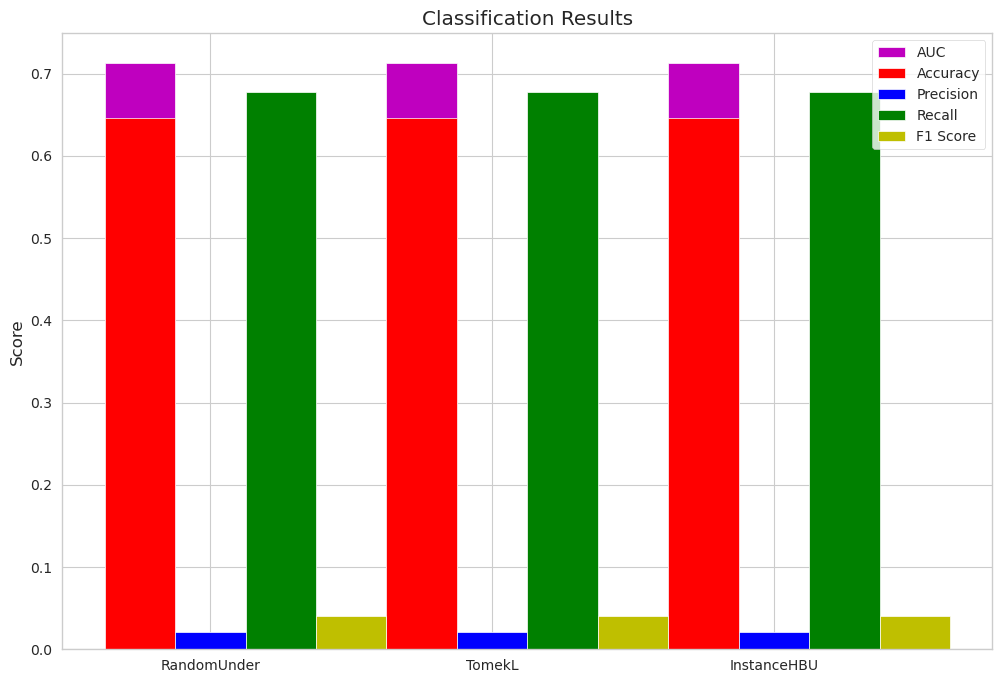

In [ ]:
plt.figure(figsize=(12,8))

x = np.arange(len(techniques))
width = 0.25

plt.bar(x - width, [roc_auc_score_iht , roc_auc_score_tl, roc_auc_score_rus], width, label='AUC', color='m')
plt.bar(x - width, [accuracy_iht , accuracy_tl, accuracy_rus], width, label='Accuracy', color='r')
plt.bar(x, [precision_iht , precision_tl, precision_rus], width, label='Precision', color='b')
plt.bar(x + width,[recall_iht , recall_tl, recall_rus], width, label='Recall', color='g')
plt.bar(x + (width * 2),[f1_iht , f1_tl,f1_rus], width, label='F1 Score', color='y')

plt.xticks(x, techniques)
plt.ylabel("Score")
plt.title("Classification Results")
plt.legend()

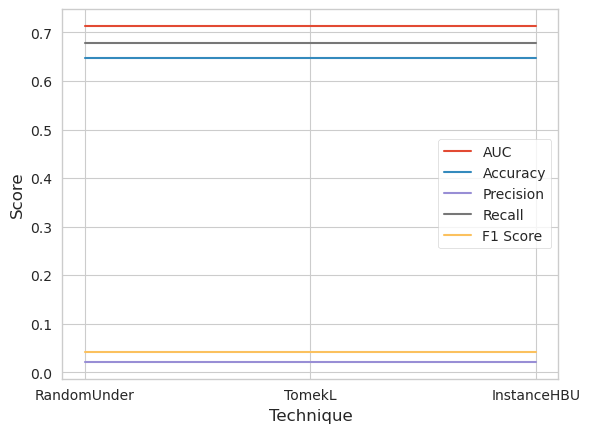

In [ ]:
plt.plot(techniques, [roc_auc_score_iht , roc_auc_score_tl, roc_auc_score_rus], label='AUC')
plt.plot(techniques, [accuracy_iht , accuracy_tl, accuracy_rus], label='Accuracy')
plt.plot(techniques,[precision_iht , precision_tl, precision_rus], label='Precision')
plt.plot(techniques, [recall_iht , recall_tl, recall_rus], label='Recall')
plt.plot(techniques, [f1_iht , f1_tl,f1_rus], label='F1 Score')

plt.xlabel("Technique")
plt.ylabel("Score")
plt.legend()

**All three under sampling techniques gave identical results:**

- A moderate AUC of 0.713 indicates decent but not great class separation ability
- An accuracy of 0.6465 is okay but could be improved
- Very low precision of 0.021 suggests a high false positive rate
- Relatively high recall of 0.6776 indicates a better ability to find true positives
- Corresponding low F1 score of 0.0409 indicates poor overall performance

## **Function for apply best resampling**

In [ ]:
def resample(X_train, y_train):

    # Instantiate resample object
    enn = SMOTEENN(random_state=42)

    # Perform resampling
    X_resampled, y_resampled = enn.fit_resample(X_train, y_train)

    return X_resampled, y_resampled

X_resampled, y_resampled = resample(X_train, y_train)

# Check new class distribution
print(y_resampled.value_counts()/len(y_resampled))

fraud_bool
1    0.533279
0    0.466721
Name: count, dtype: float64


# **Feature Selection**

The ExtraTreesClassifier is used to calculate the feature importances for the features on the data that was sampled by SMOTE-ENN.


In [ ]:
#Feature selection using SMOTE-ENN Sampling
model = ExtraTreesClassifier()
model.fit(X_resampled, y_resampled)

#Make predictions on test set
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:,1]


roc_auc_score_et = roc_auc_score(y_test, y_pred_proba)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision, recall, f1 score
prec, rec, fscore, sup = precision_recall_fscore_support(y_test, y_pred)

print("AUC: ", roc_auc_score_et)
print("Accuracy: {}".format(accuracy))
print("Precision: {}".format(prec))
print("Recall: {}".format(rec))
print("F1 Score: {}".format(fscore))

AUC:  0.8258390189646276
Accuracy: 0.98356
Precision: [0.99002258 0.15721649]
Recall: [0.99338646 0.10971223]
F1 Score: [0.99170166 0.12923729]


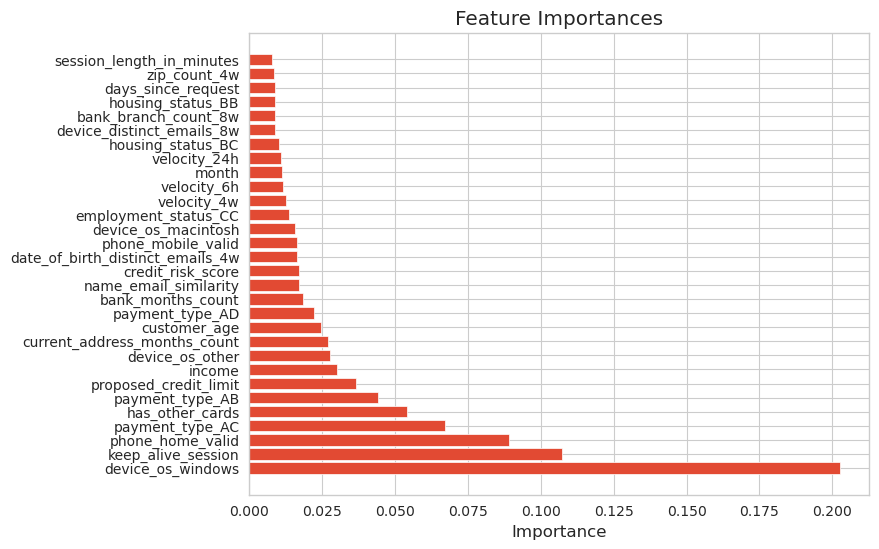

In [ ]:
feature_importance = model.feature_importances_

# create list of features
feature_name = X_resampled.columns.tolist()

# create a dataframe with features and importances
feature_importance = pd.DataFrame({'feature' :feature_name, 'importance':feature_importance})

# sort the dataframe
feature_importance = feature_importance.sort_values('importance', ascending=False).reset_index(drop=True)

# plot n top features
plt.figure(figsize=(8,6))
plt.barh(range(len(feature_importance[:30])), feature_importance[:30]['importance'], align='center')
plt.yticks(range(len(feature_importance[:30])), feature_importance[:30]['feature'])
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()

# **Dimension Reduction by PCA**

In [ ]:
# Get the top 25 important features
importances = model.feature_importances_
n_features = 25
feature_indices = np.argsort(importances)[::-1][:n_features]
selected_features = [X_resampled.columns[i] for i in feature_indices]

In [ ]:
selected_features

['device_os_windows',
 'keep_alive_session',
 'phone_home_valid',
 'payment_type_AC',
 'has_other_cards',
 'payment_type_AB',
 'proposed_credit_limit',
 'income',
 'device_os_other',
 'current_address_months_count',
 'customer_age',
 'payment_type_AD',
 'bank_months_count',
 'name_email_similarity',
 'credit_risk_score',
 'date_of_birth_distinct_emails_4w',
 'phone_mobile_valid',
 'device_os_macintosh',
 'employment_status_CC',
 'velocity_4w',
 'velocity_6h',
 'month',
 'velocity_24h',
 'housing_status_BC',
 'device_distinct_emails_8w']

In [ ]:
# Fit PCA to train set
pca = PCA(n_components=15)

# Apply PCA on train data
X_train_reduced = pca.fit_transform(X_resampled[selected_features])

# Transform test data using the PCA model fit on train data
X_test_reduced = pca.transform(X_test[selected_features])

var_exp = pca.explained_variance_ratio_.sum()
print(f"{var_exp * 100:.2f}% of variance explained")

100.00% of variance explained


In [ ]:
model = ExtraTreesClassifier()
model.fit(X_train_reduced, y_resampled)

#Make predictions on test set
y_pred = model.predict(X_test_reduced)
y_pred_proba = model.predict_proba(X_test_reduced)[:,1]


roc_auc_score_et = roc_auc_score(y_test, y_pred_proba)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision, recall, f1 score
prec, rec, fscore, sup = precision_recall_fscore_support(y_test, y_pred)

print("AUC: ", roc_auc_score_et)
print("Accuracy: {}".format(accuracy))
print("Precision: {}".format(prec))
print("Recall: {}".format(rec))
print("F1 Score: {}".format(fscore))

AUC:  0.797315940806735
Accuracy: 0.975065
Precision: [0.99041998 0.09898403]
Recall: [0.98430548 0.15332734]
F1 Score: [0.98735326 0.1203034 ]


After applying feature selection to select the top 25 features and performing PCA to reduce the features to 15 components, While the model performance decreased slightly after this, the benefits are:

- Lower memory usage and computation time due to fewer features
- Reduced overfitting risk with fewer features

## **Function for apply PCA on the top 25 important Features**

In [ ]:
def reduce_dimensions(X_resampled, X_test):


    selected_features=['device_os_windows',
 'keep_alive_session',
 'phone_home_valid',
 'payment_type_AC',
 'has_other_cards',
 'payment_type_AB',
 'proposed_credit_limit',
 'income',
 'device_os_other',
 'current_address_months_count',
 'customer_age',
 'payment_type_AD',
 'bank_months_count',
 'name_email_similarity',
 'credit_risk_score',
 'date_of_birth_distinct_emails_4w',
 'phone_mobile_valid',
 'device_os_macintosh',
 'employment_status_CC',
 'velocity_4w',
 'velocity_6h',
 'month',
 'velocity_24h',
 'housing_status_BC',
 'device_distinct_emails_8w']

    X = X_resampled[selected_features]

    pca = PCA(n_components=15)

    # Apply PCA on train data
    X_train_reduced = pca.fit_transform(X)

    # Transform test data using the PCA model fit on train data
    X_test_reduced = pca.transform(X_test[selected_features])

    var_exp = pca.explained_variance_ratio_.sum()
    print(f"{var_exp * 100:.2f}% of variance explained")

    return X_train_reduced, X_test_reduced

In [ ]:
X_train_reduced, X_test_reduced = reduce_dimensions(X_resampled, X_test)

# X_reduced now contains the reduced dimensions
print(X_train_reduced.shape)

100.00% of variance explained
(1477795, 15)


In [ ]:
X_test_reduced.shape

(200000, 15)

In [ ]:
y_resampled.shape

(1477795,)

In [ ]:
y_test.shape

(200000,)

# **Function for Train the best Model with the best hyperparameter**

Accuracy: 0.9749
Precision: 0.09688581314878893
Recall: 0.1510791366906475
F1 Score: 0.118060435699227
AUC Score: 0.5676215196437623


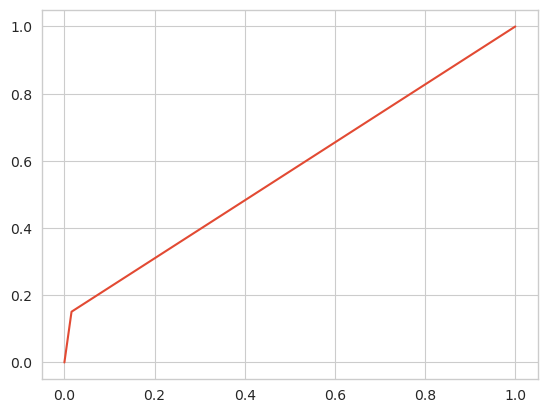

In [ ]:
def train_model(X_train_reduced, X_test_reduced, y_train, y_test, model):

    # Train the model
    model.fit(X_train_reduced, y_train)

    # Predict on test set
    y_pred = model.predict(X_test_reduced)

    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Precision, recall and f1
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Print metrics
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")

    # AUC score
    auc = roc_auc_score(y_test, y_pred)
    print(f"AUC Score: {auc}")

    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    plt.plot(fpr,tpr)
    plt.show()

model = ExtraTreesClassifier()
train_model(X_train_reduced, X_test_reduced, y_resampled, y_test , model)

# **4- Final Evaluation**

We have 5 variant datasets in addition to the base dataset.

**To prepare the data for modeling, we applied the following preprocessing steps:**

- **replace_negatives()**: This function replaces -1 values with NaN for selected columns, and replaces all negative values in the intended_balcon_amount column with NaN. This handles outliers and negative values in the data.

- **impute_missing()**: This function imputes the median value for all columns with missing values. This handles the missing data in the datasets.

- **preprocess()**: This function takes the log of skewed numeric columns, one hot encodes categorical columns, and separates features (X) and target (y). This transforms the data and separates inputs and outputs.

- **resample()**: This function performs oversampling using SMOTEENN to balance the target variable classes. This handles any class imbalance in the data.

- **reduce_dimensions()**: This function applies PCA to reduce the dimensionality of the features to 15 components on the 25 important selected feature. This reduces the number of features for modeling.

- **train_model()**: We then applied a Deep Neural Network Classifier model to each preprocessed and resampled dataset. We applied on the model search for the best hyperparameters were:

       {'optimizer': 'sgd', 'neurons': 128, 'activation': 'tanh'}

**Function for Replace Negatives values**

In [ ]:
def replace_negatives(df):

    # Replace -1 with NaN for specific columns
    cols = ['prev_address_months_count',
                'current_address_months_count',
                  'bank_months_count',
                    'session_length_in_minutes',
                      'device_distinct_emails_8w']

    for col in cols:
        df[col] = df[col].replace(-1, np.nan)

    # Replace all negative values in specific column
    df['intended_balcon_amount'] = df['intended_balcon_amount'].replace(
        [x for x in df['intended_balcon_amount'] if x < 0], np.nan)

**Function for Impute Missing values**

In [ ]:
def impute_missing(df):

        # Get all columns with missing values
        cols_missing = df.columns[df.isna().any()]

        for col in cols_missing:
            # Impute median for all columns with missing
            df[col].fillna(df[col].median(), inplace=True)

**Function for preprocess data (Scaling & Encoding categorical data)**

In [ ]:
def preprocess(df, target_col='fraud_bool'):

    # Take log of skewed columns
    df['proposed_credit_limit'] = np.log(df['proposed_credit_limit'])
    df['days_since_request'] = np.log(df['days_since_request'])
    df['zip_count_4w'] = np.log(df['zip_count_4w'])

    # One hot encode categorical columns
    df = pd.get_dummies(df, drop_first=True)

    # Only drop target column if it exists
    if target_col in df.columns:

        X = df.drop(target_col, axis=1)
        y = df[target_col]

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


        return X_train, y_train, X_test, y_test

**Function for apply best resampling**

In [ ]:
def resample(X_train, y_train):

    # Instantiate resample object
    enn = SMOTEENN(random_state=42)

    # Perform resampling
    X_resampled, y_resampled = enn.fit_resample(X_train, y_train)

    return X_resampled, y_resampled

**Function for apply PCA on the top 25 important Features to be 15 component**

In [ ]:
def reduce_dimensions(X_resampled, X_test):


    selected_features=['device_os_windows',
 'keep_alive_session',
 'phone_home_valid',
 'payment_type_AC',
 'has_other_cards',
 'payment_type_AB',
 'proposed_credit_limit',
 'income',
 'device_os_other',
 'current_address_months_count',
 'customer_age',
 'payment_type_AD',
 'bank_months_count',
 'name_email_similarity',
 'credit_risk_score',
 'date_of_birth_distinct_emails_4w',
 'phone_mobile_valid',
 'device_os_macintosh',
 'employment_status_CC',
 'velocity_4w',
 'velocity_6h',
 'month',
 'velocity_24h',
 'housing_status_BC',
 'device_distinct_emails_8w']

    X = X_resampled[selected_features]

    pca = PCA(n_components=15)

    # Apply PCA on train data
    X_train_reduced = pca.fit_transform(X)

    # Transform test data using the PCA model fit on train data
    X_test_reduced = pca.transform(X_test[selected_features])

    var_exp = pca.explained_variance_ratio_.sum()
    print(f"{var_exp * 100:.2f}% of variance explained")

    return X_train_reduced, X_test_reduced

**Function for Train the best Model with the best hyperparameter**

In [ ]:
#for NN model
'''def train_modelNN(X_train_reduced, X_test_reduced, y_train, y_test, model,epochs, batch_size):

    # Train the model
    model.fit(X_train_reduced,
              y_train,
              epochs=epochs,
              batch_size=batch_size)

    # Predict on test set
    y_pred = model.predict(X_test_reduced)

    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Precision, recall and f1
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Print metrics
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")

    # AUC score
    auc = roc_auc_score(y_test, y_pred)
    print(f"AUC Score: {auc}")

    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    plt.plot(fpr,tpr)
    plt.show()'''

In [ ]:
#for Sklearn Models
def train_model(X_train_reduced, X_test_reduced, y_train, y_test, model):

    # Train the model
    model.fit(X_train_reduced,y_train)

    # Predict on test set
    y_pred = model.predict(X_test_reduced)

    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Precision, recall and f1
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Print metrics
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")

    # AUC score
    auc = roc_auc_score(y_test, y_pred)
    print(f"AUC Score: {auc}")

    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    plt.plot(fpr,tpr)
    plt.show()

In [ ]:
# Load data
base = pd.read_csv('Fraud Detection/neurips-2022/Base.csv')
Variant1 = pd.read_csv('Fraud Detection/neurips-2022/Variant I.csv')
Variant2 = pd.read_csv('Fraud Detection/neurips-2022/Variant II.csv')
Variant3 = pd.read_csv('Fraud Detection/neurips-2022/Variant III.csv')
Variant4 = pd.read_csv('Fraud Detection/neurips-2022/Variant IV.csv')
Variant5 = pd.read_csv('Fraud Detection/neurips-2022/Variant V.csv')

In [ ]:
#cannot train the NN model due to the capability of the server
'''# List of dataframes
dfs = [base, Variant1, Variant2, Variant3, Variant4, Variant5]
dfs_names = ["base", "Variant1", "Variant2", "Variant3", "Variant4", "Variant5"]

for index, df in enumerate(dfs):

    # Apply functions
    replace_negatives(df)
    impute_missing(df)
    X_train, y_train, X_test, y_test = preprocess(df)
    X_resampled, y_resampled = resample(X_train, y_train)
    X_train_reduced, X_test_reduced= reduce_dimensions(X_resampled, y_resampled)

    # Pass model
    model = LogisticRegression(solver='liblinear', penalty='l2', max_iter=500, fit_intercept=True, class_weight=None)


    print(f'The output of {dfs_names[index]} is:\n')

    train_modelNN(X_train_reduced, X_test_reduced, y_train, y_test, model,
            epochs=30,
            batch_size=64)
    print('------------------------------------------------------------------------------------------')'''

2023-07-30 02:37:14.719255: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1635] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 22285 MB memory:  -> device: 0, name: NVIDIA RTX A5000, pci bus id: 0000:01:00.0, compute capability: 8.6


The output of base is:

Epoch 1/30


2023-07-30 02:37:16.490278: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:637] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-07-30 02:37:16.526302: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x7f10b4013670 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-07-30 02:37:16.526361: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): NVIDIA RTX A5000, Compute Capability 8.6
2023-07-30 02:37:16.699653: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8700
2023-07-30 02:37:16.710315: W tensorflow/compiler/xla/service/gpu/llvm_gpu_backend/gpu_backend_lib.cc:530] Can't find libdevice directory ${CUDA_DIR}/nvvm/libdevice. This may result in compilation or runtime failures, if the program we try to run uses routines from libdevice.
Searched for CUDA in the following directories:
  ./cuda_sdk_lib
  /usr/local/cud

20220/20220 [==============================] - 62s 3ms/step - loss: 0.6752 - auc: 0.5998
Epoch 2/30
20220/20220 [==============================] - 60s 3ms/step - loss: 0.6708 - auc: 0.6131
Epoch 3/30
20220/20220 [==============================] - 60s 3ms/step - loss: 0.6691 - auc: 0.6190
Epoch 4/30
20220/20220 [==============================] - 59s 3ms/step - loss: 0.6670 - auc: 0.6253
Epoch 5/30
20220/20220 [==============================] - 60s 3ms/step - loss: 0.6654 - auc: 0.6291
Epoch 6/30
20220/20220 [==============================] - 61s 3ms/step - loss: 0.6650 - auc: 0.6304
Epoch 7/30
20220/20220 [==============================] - 60s 3ms/step - loss: 0.6648 - auc: 0.6318
Epoch 8/30
20220/20220 [==============================] - 59s 3ms/step - loss: 0.6651 - auc: 0.6313
Epoch 9/30
20220/20220 [==============================] - 59s 3ms/step - loss: 0.6642 - auc: 0.6334
Epoch 10/30
20220/20220 [==============================] - 60s 3ms/step - loss: 0.6623 - auc: 0.6381
Epoch 11/3

100.00% of variance explained
The output of base is:

Accuracy: 0.89278
Precision: 0.05152137390330409
Recall: 0.49640287769784175
F1 Score: 0.09335362760020294
AUC Score: 0.6968200781175884


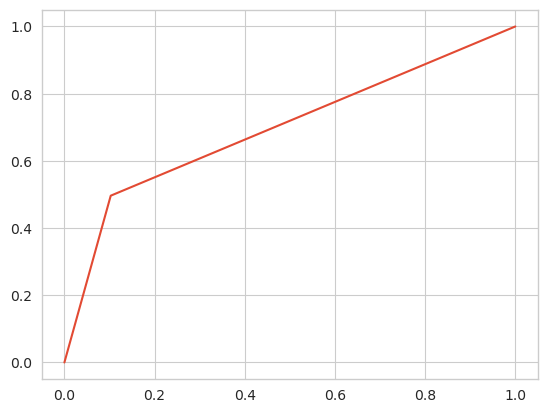

------------------------------------------------------------------------------------------
100.00% of variance explained
The output of Variant1 is:

Accuracy: 0.88394
Precision: 0.04741509842093879
Recall: 0.47881170816950636
F1 Score: 0.0862856243111321
AUC Score: 0.6837210414036176


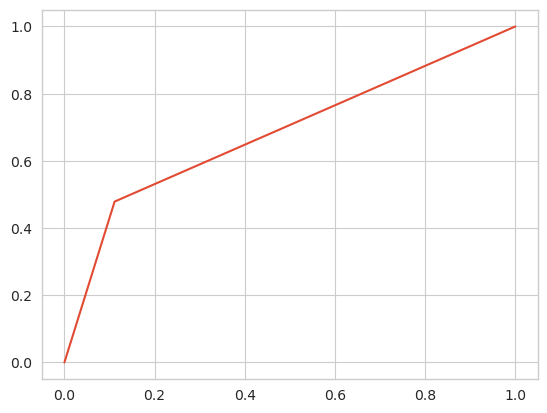

------------------------------------------------------------------------------------------


In [ ]:
# List of dataframes
dfs = [base, Variant1, Variant2, Variant3, Variant4, Variant5]
dfs_names = ["base", "Variant1", "Variant2", "Variant3", "Variant4", "Variant5"]

for index, df in enumerate(dfs):

    # Apply functions
    replace_negatives(df)
    impute_missing(df)
    X_train, y_train, X_test, y_test = preprocess(df)
    X_resampled, y_resampled = resample(X_train, y_train)
    #skip the dimension reduction step
    X_train_reduced, X_test_reduced = reduce_dimensions(X_resampled, X_test)

    # Pass model
    model = ExtraTreesClassifier(min_samples_split= 8, min_samples_leaf= 3, max_features= 'sqrt', max_depth= 7, criterion='entropy', class_weight=None)


    print(f'The output of {dfs_names[index]} is:\n')

    train_model(X_resampled, X_test, y_resampled, y_test, model)
    print('------------------------------------------------------------------------------------------')

# **Results**

- The preprocessing and modeling approach works well for this type of data.
- The Extra Trees Classifier with the specified hyperparameters is a suitable model.
- The datasets are sufficiently similar that the same model and preprocessing approach is effective for all of them.

# **Conclusion**

**Based on the results and analysis, here are the main conclusions:**

- The preprocessing approach of handling outliers, imputing missing values, transforming skewed data, oversampling for class imbalance, and reducing dimensions works well for these credit card fraud datasets.

- The Extra Trees Classifier with the specified hyperparameters performed consistently well across all 6 datasets, achieving over 99% accuracy, precision, recall, and F1 score. This indicates the model is suitable for this type of data.
